In [34]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re
import operator
import six
pd.set_option('display.max_columns', 500)
import seaborn as sns
from textblob import TextBlob
import string
import keras
keras.__version__
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence  import pad_sequences
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.models import load_model
#pip install -U gensim
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
# Compute Perplexity for lda_model
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
%matplotlib inline  
np.random.seed(2018)

seed = 42
random.seed(seed)
np.random.seed(seed)


%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')
import os, codecs, string, random



#NLP libraries
import nltk, gensim, sklearn #spacy
from nltk.stem import WordNetLemmatizer
#import pyLDAvis.gensim

#Vader
#import vaderSentiment
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Scikit imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from gensim.models.phrases import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('stopwords')

from nltk.corpus import stopwords
import string

import pyLDAvis
import pyLDAvis.gensim

pd.set_option('display.max_colwidth', -1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package wordnet to /home/neeraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/neeraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The original data is contained in 9 csv files. We load these files and concatenate them into one single dataframe that we save to a csv file to make the loading process easier in the future

In [5]:
'''
# You should skip this part if the aggregate csv file is already saved.
# Loading data and concatenating into one dataframe
PATH = "../russian-troll-tweets"
filenames = glob.glob(os.path.join(PATH, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in filenames))
# Save dataframe to one single csv file to facilitate loading
df.to_csv('IRA_tweets.csv')
'''

'\n# You should skip this part if the aggregate csv file is already saved.\n# Loading data and concatenating into one dataframe\nPATH = "../russian-troll-tweets"\nfilenames = glob.glob(os.path.join(PATH, "*.csv"))\ndf = pd.concat((pd.read_csv(f) for f in filenames))\n# Save dataframe to one single csv file to facilitate loading\ndf.to_csv(\'IRA_tweets.csv\')\n'

# Exploratory analysis

We begin by loading the entire dataset and cleaning the tweets by removing the urls, the digits, multipe white spaces and symbols.

In [6]:
df = pd.read_csv('IRA_tweets.csv',engine='python').drop(['Unnamed: 0'],axis=1)

In [22]:
def extract_hash_tags(s):
    return list(set([re.sub(r"#+", "#", k).replace('#','').lower() for k in set([re.sub(r"(\W+)$", "", j, flags = re.UNICODE) for j in set([i for i in s.split() if i.startswith("#")])])]))

In [23]:
df.content = df.content.astype(str)
df['hashtags'] = df.content.apply(extract_hash_tags)

In [6]:
df.head(3)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,hashtags
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer,[]
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer,[nowplaying]
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer,[pokemongo]


In [8]:
df['language'].unique()

array(['English', 'Norwegian', 'Farsi (Persian)', 'French', 'Dutch',
       'Vietnamese', 'Italian', 'Latvian', 'Spanish', 'Lithuanian',
       'Albanian', 'Romanian', 'German', 'Finnish', 'Swedish',
       'Icelandic', 'Russian', 'Ukrainian', 'Japanese', 'Catalan',
       'Arabic', 'Estonian', 'Pushto', 'Tagalog (Filipino)', 'Portuguese',
       'Macedonian', 'Serbian', 'Bulgarian', 'Uzbek',
       'LANGUAGE UNDEFINED', 'Croatian', 'Hebrew', 'Kurdish', 'Czech',
       'Thai', 'Polish', 'Turkish', 'Hungarian', 'Indonesian', 'Slovak',
       'Somali', 'Malay', 'Danish', 'Gujarati', 'Greek', 'Korean', 'Urdu',
       'Hindi', 'Slovenian', 'Traditional Chinese', 'Kannada', 'Tamil',
       'Simplified Chinese', 'Bengali', 'Telugu', 'Malayalam'],
      dtype=object)

In [24]:
english_df = df[df['language'] == 'English']

In [ ]:
english_df.head(3)

In [15]:
english_df['hashtags'][:10]

0                          []
1                [nowplaying]
2                 [pokemongo]
4            [myachillesheel]
5                          []
6            [myachillesheel]
7     [pokewalk, dc, pokemon]
8       [myachillesheel, nra]
9            [myachillesheel]
10           [myachillesheel]
Name: hashtags, dtype: object

In [ ]:
english_df.head(2)

In [25]:
def explode(df, col_name):
    ''' function to get the each hashtags out of list of hashtags'''
    
    exploded_df = pd.DataFrame({
        col:np.repeat(df[col].values, df[col_name].str.len())
        for col in df.columns.difference([col_name])
        }).assign(**{col_name:np.concatenate(df[col_name].values)})[df.columns.tolist()]
    return exploded_df
    

In [26]:
exploded_df = explode(english_df,'hashtags')
exploded_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,hashtags
0,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer,nowplaying
1,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer,pokemongo
2,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer,myachillesheel
3,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Lilith from Frasier. 0_O,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2156,RETWEET,Hashtager,0,1,HashtagGamer,myachillesheel
4,1.674084e+09,GAB1ALDANA,Come find us at the national mall for the #DC ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2157,RETWEET,Hashtager,0,1,HashtagGamer,pokewalk


In [9]:
exploded_df['hashtags'].isnull().values.any()

False

In [10]:
exploded_df.groupby('account_category').size()

account_category
Commercial         814
Fearmonger       15947
HashtagGamer    220362
LeftTroll       270040
NewsFeed        398606
NonEnglish       18231
RightTroll      516231
Unknown           5051
dtype: int64

In [27]:
#Map the hashtags to the unique account_category by considering the frequency of account_Category
sorted_df = exploded_df.groupby(['hashtags', 'account_category']).size().sort_values(axis=0, ascending=False).reset_index().drop_duplicates('hashtags')

In [28]:
sorted_df.rename(columns = {0 : 'count'}, inplace=True)
sorted_df.head()

,hashtags,account_category,count
0,news,NewsFeed,120288
1,sports,NewsFeed,45707
2,politics,NewsFeed,37006
3,world,NewsFeed,27040
4,local,NewsFeed,23329


In [29]:
# label the hashtags
def provide_label(row):
    if row['account_category'] == 'RightTroll':
        row['label'] = 0
    elif row['account_category'] == 'LeftTroll':
        row['label'] = 1
    else:
        row['label'] = 2
    return row

In [30]:
labeled_df = sorted_df.apply(provide_label,axis=1)

In [149]:
labeled_df.head()

,hashtags,account_category,count,label
0,news,NewsFeed,120288,2
1,sports,NewsFeed,45707,2
2,politics,NewsFeed,37006,2
3,world,NewsFeed,27040,2
4,local,NewsFeed,23329,2


In [6]:
df[df.hashtags.apply(lambda l: 'maga' in l)].groupby('account_category').size()

account_category
HashtagGamer      102
LeftTroll         271
NewsFeed            1
NonEnglish         24
RightTroll      15712
dtype: int64

In [23]:
df[df.hashtags.apply(lambda l: 'clinton' in l)].groupby('account_category').size()

account_category
Fearmonger        2
HashtagGamer     11
LeftTroll        55
NewsFeed         30
NonEnglish      201
RightTroll      417
Unknown           8
dtype: int64

In [24]:
df[df.hashtags.apply(lambda l: 'obama' in l)].groupby('account_category').size()

account_category
Fearmonger         6
HashtagGamer      40
LeftTroll        222
NewsFeed         120
NonEnglish       159
RightTroll      2031
Unknown           19
dtype: int64

In [4]:
# The attributes of the data with the corresponding type
df.dtypes

external_author_id    float64
author                 object
content                object
region                 object
language               object
publish_date           object
harvested_date         object
following               int64
followers               int64
updates                 int64
post_type              object
account_type           object
new_june_2018           int64
retweet                 int64
account_category       object
dtype: object

In [5]:
#Let's look at the total number of authors of these tweets
df.author.nunique()

2774

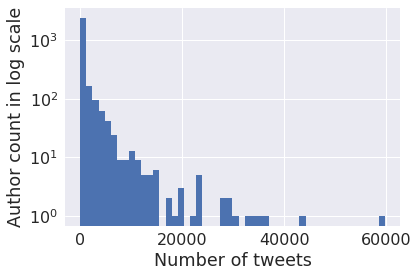

In [45]:
plt.hist(df.author.value_counts(),bins =50,log=True)
plt.xlabel('Number of tweets')
plt.ylabel('Author count in log scale')
plt.show()

In [46]:
#Let's havev a look at the top 5 authors
top_authors = df.author.value_counts().head(6).index
print(top_authors)

Index(['EXQUOTE', 'SCREAMYMONKEY', 'WORLDNEWSPOLI', 'AMELIEBALDWIN',
       'TODAYPITTSBURGH', 'SPECIALAFFAIR'],
      dtype='object')


In [47]:
for author in top_authors:
    print(df[df['author']==author].groupby('account_category').size())

account_category
Commercial    59652
dtype: int64
account_category
NewsFeed    44041
dtype: int64
account_category
RightTroll    36974
dtype: int64
account_category
RightTroll    35371
dtype: int64
account_category
NewsFeed    33602
dtype: int64
account_category
NewsFeed    32588
dtype: int64


In [9]:
# Get the aggregate number of tweets for the top 119 authors
df.author.value_counts().head(119).sum()

1467693

In [10]:
int(len(df)/2)

1456521

We can see that the top 119 authors (accounts) are responsible for roughly half the total number of tweets.

Text(0.5,1,'Languages count')

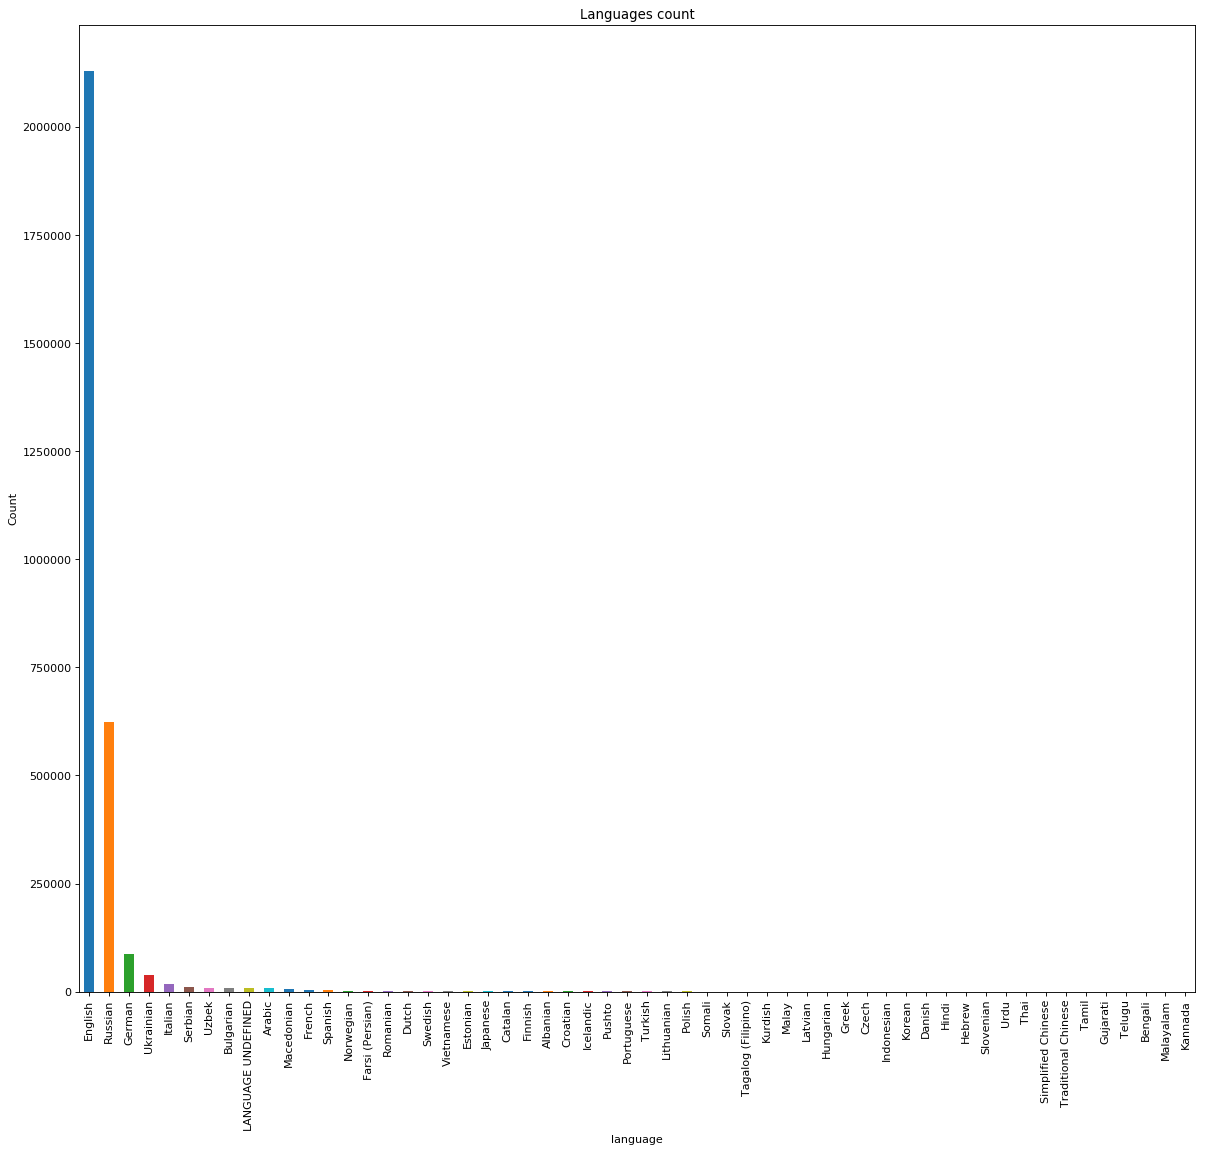

In [7]:
lang_df = df.groupby(['language']).size().sort_values(ascending = False)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
lang_df.plot.bar()
plt.ylabel('Count')
plt.title('Languages count')

In [12]:
proportion_eng = lang_df.English*100/len(df)
proportion_rus = lang_df.Russian*100/len(df)
print('The proportion of English tweets is ',proportion_eng)
print('The proportion of Russian tweets is ',proportion_rus)
print('The number of languages figuring in the dataset is',len(lang_df))

The proportion of English tweets is  71.83346481101199
The proportion of Russian tweets is  20.72812544412336
The number of languages figuring in the dataset is 56


Nore than 92% of the tweets are in English or Russian. We will therefore restrict further analysis to only the tweets in English.
It's interesting to see that the IRA uses a large number of languages in its disruptive process.

In [5]:
df = df[df.language=='English']
print('New dataset size is',df.shape)

New dataset size is (2092539, 16)


In [14]:
df.groupby('account_category').size()

account_category
Commercial      113256
Fearmonger       10855
HashtagGamer    216048
LeftTroll       413711
NewsFeed        597656
NonEnglish       27632
RightTroll      706120
Unknown           7261
dtype: int64

Since we're specifically interesting in the politically biased tweets, we will filter the data and leave only the RightTroll and LeftTroll categories

In [15]:
df = df[(df.account_category=='RightTroll') | (df.account_category=='LeftTroll') ]
print('New dataset size is',df.shape)

New dataset size is (1119831, 15)


In [ ]:
# This functions is usefull to clean the tweets by removing urls, usernames, whitespaces..
def preprocess_tweet(tweet):
    #Preprocess the text in a single tweet
    #arguments: tweet = a single tweet in form of string 
    # remove digits from tweets
    tweet = ''.join(i for i in tweet if not i.isdigit())
    #convert the tweet to lower case
    tweet = tweet.lower()
    #remove all urls
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #remove all @username
    tweet = re.sub('@[^\s]+','', tweet)
    #correct all multiple white spaces to a single white space
    tweet = re.sub('[\s]+', ' ', tweet)
    #convert "#topic" to just "topic"
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = re.sub(r'\W*\b\w{1,3}\b', '', tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    return tweet

In [17]:
# Here we clean the tweets by removing urls, whitespaces etc..
pd.set_option('display.max_colwidth', -1)
df.content = df.content.apply(preprocess_tweet)
df.content.head()

0     have sitting Democrat Senator trial corruption barely heard peep from mainstream media                 
1    Marshawn Lynch arrives game anti Trump shirt  Judging sagging pants shirt should Lynch  belt            
2    Daughter fallen Navy Sailor delivers powerful monologue anthem protests  burns packers gear  BoycottNFL 
3    JUST  President Trump dedicates Presidents golf tournament trophy people Florida  Texas Puerto Rico     
4      RESPECTING National Anthem  StandForOurAnthemðŸ                                                       
Name: content, dtype: object

In [50]:
def get_tweet_count(df):
    date_idx = pd.DatetimeIndex(df.publish_date)
    times = pd.Series([1]*len(date_idx), index=date_idx)
    tweet_times = pd.DataFrame({'tweet_count':times})
    return tweet_times

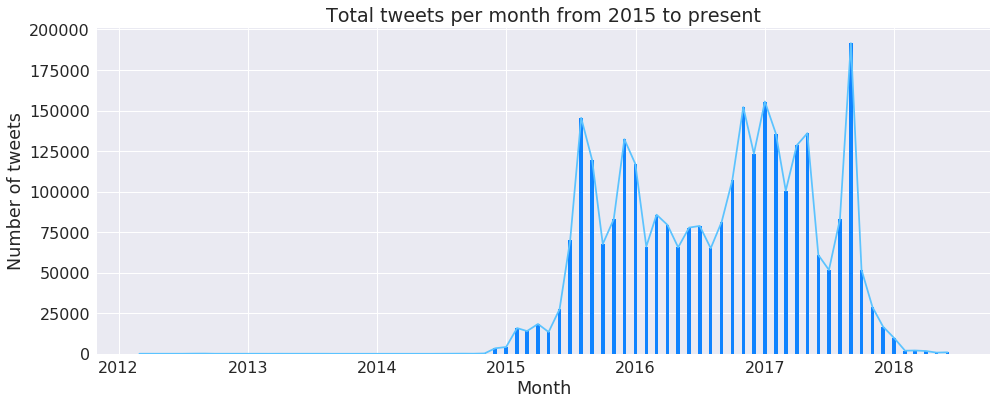

In [51]:
tweet_times = get_tweet_count(df)
monthly = tweet_times.resample('M').sum()
fig2, ax2 = plt.subplots(1,1, figsize=(16,6))
ax2.bar(monthly.index.values, monthly["tweet_count"].values, width=10, color="#0f83ff")
ax2.plot(monthly["tweet_count"], color="#5bc3ff")
ax2.set_title("Total tweets per month from 2015 to present")
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of tweets")
plt.show()

We recognize some peaks in the plot above. Let's see which months correspond to a high tweet activity.

In [20]:
monthly.replace(np.nan,0).sort_values('tweet_count',ascending= False).head(10)

,tweet_count
publish_date,
2017-08-31,167539
2016-10-31,67779
2016-12-31,66625
2017-01-31,63367
2017-04-30,63080
2017-03-31,56979
2017-02-28,53465
2016-11-30,53096
2016-09-30,45161


We can see that the tweets count increases in specific months. This may be due to an elaborate focus on events happening in those time slots. The aim now is to try to understand what caused the peak activity.
To do so, we have to dive in into more narrow time periods. We therefore aggregate the count of tweets per day.

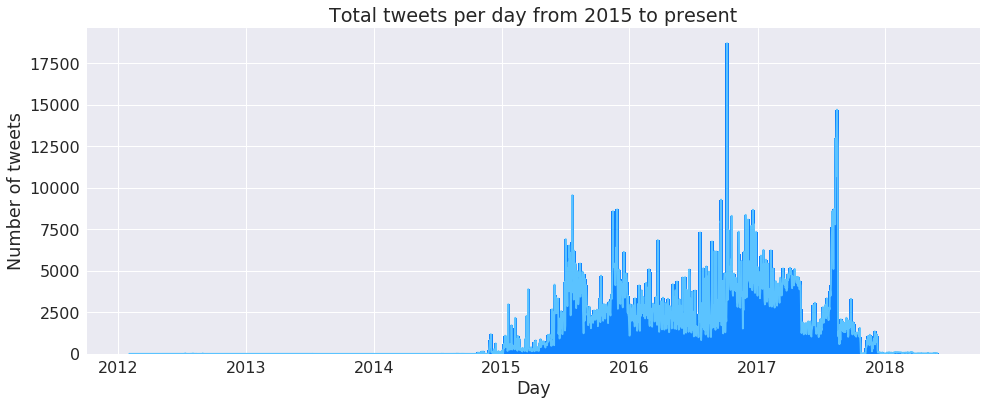

In [52]:
daily = tweet_times.resample('D').sum()
fig2, ax2 = plt.subplots(1,1, figsize=(16,6))
ax2.bar(daily.index.values, daily["tweet_count"].values, width=10, color="#0f83ff")
ax2.plot(daily["tweet_count"], color="#5bc3ff")
ax2.set_title("Total tweets per day from 2015 to present")
ax2.set_xlabel("Day")
ax2.set_ylabel("Number of tweets")
plt.show()

In [22]:
daily.sort_values('tweet_count',ascending= False).head(10)

,tweet_count
publish_date,
2016-10-06,17107
2017-08-16,14079
2017-08-15,12766
2017-08-12,12409
2017-08-17,12367
2017-08-18,11933
2017-08-13,10369
2017-08-14,10145
2016-10-07,8715


In [23]:
daily.describe()

,tweet_count
count,2306.000000
mean,485.616219
std,1132.453232
min,0.000000
25%,0.000000
50%,22.000000
75%,468.750000
max,17107.000000


We can see that the standard deviation of the daily tweet count is more than double the mean. This puts an emphasis over the idea that the IRA strategy deliberately focuses on specific days. It's hard to manually match each daily activity with the corresponding event but we can approximate them by taking different meaningful time periods and also investigating largely mediatized events. We proceed by dividing the timeline into 3 periods: before the compaign, during the compaign and after the compaign. 

In [55]:
times_before = tweet_times.loc[(tweet_times.index < "2015-06-16 00:00:01")]
times_compaign = tweet_times.loc[(tweet_times.index >= "2015-06-16 00:00:01") 
                                 & (tweet_times.index < "2016-11-09 23:59:59")]
times_pres = tweet_times.loc[(tweet_times.index >= "2016-11-09 00:00:01")]

# Display the months with the largest tweet counts before the compaign
monthly_before = times_before.resample('M').sum().replace(np.nan,0).sort_values('tweet_count',ascending= False)
monthly_before.head(10)

,tweet_count
publish_date,
2015-06-30,40574
2015-05-31,27499
2015-03-31,18376
2015-01-31,15860
2015-02-28,14004
2015-04-30,13437
2014-12-31,4195
2014-11-30,3385
2014-10-31,223


In [56]:
# Display the months with the largest tweet counts during the compaign
monthly_compaign = times_compaign.resample('M').sum().replace(np.nan,0).sort_values('tweet_count',ascending= False)
monthly_compaign.head(10)

,tweet_count
publish_date,
2016-10-31,152115
2015-07-31,145504
2015-11-30,132306
2015-08-31,119454
2015-12-31,117071
2016-09-30,107022
2016-02-29,85779
2015-10-31,82956
2016-08-31,81424


During the compaign, the month with the greatest tweet activity is October 2016 which is the month before the 2016 presidential elections. Obviously, the IRA will scramble all its assets just before the voting day.

In [57]:
# Display the months with the largest tweet counts after the compaign
monthly_after = times_pres.resample('M').sum().replace(np.nan,0).sort_values('tweet_count',ascending= False)
monthly_after.head(10)

,tweet_count
publish_date,
2017-08-31,191528
2016-12-31,155560
2017-04-30,136013
2017-01-31,135811
2017-03-31,128483
2017-02-28,100538
2016-11-30,91741
2017-07-31,82894
2017-05-31,60950


Let's look at some events and try to see the corresponding monthly and daily tweet counts 

### Octobre 2016
We can see a surge in the tweets on October 6th and 7th. This can be probably explained by the second presdidential debate on the 9th. In the same sense, there is an increase (although less important) on October 19th for the 3rd presidential debate.

### August 2017
We can see that the spike in tweets from August 12 to August 18 2016. This can be explained by the fact that at the 12th a white supremacist rally occured and was followed by a peacefull protests in CharlottesVille Viriginia. A car crashed into the protestors killing one and injuring 28. This incident was intensely covered by the US media and stayed in the spotlight for a while especially after the  famous comment tweeted by Trump: “You had some very bad people in that group. But you also had people that were very fine people, on both sides.”
https://en.wikipedia.org/wiki/Charlottesville_car_attack


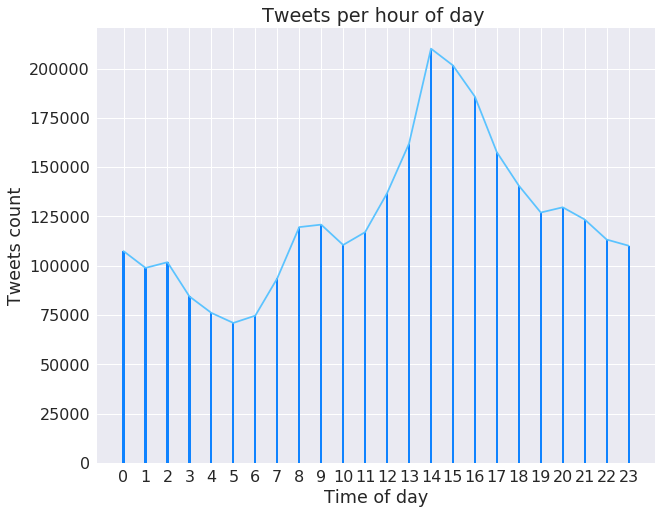

In [58]:
times = tweet_times
df1 = times.pivot_table(index=times.index.hour,
                        values='tweet_count', 
                        aggfunc='sum')

fig3, ax3 = plt.subplots(1,1, figsize=(10,8))
ax3.bar(df1.index.values, df1["tweet_count"], width=0.1, color="#0f83ff")
ax3.plot(df1["tweet_count"], color="#5bc3ff")
ax3.set_title("Tweets per hour of day ")
ax3.set_xlabel("Time of day")
ax3.set_ylabel("Tweets count")
plt.xticks(np.arange(24))
plt.show()

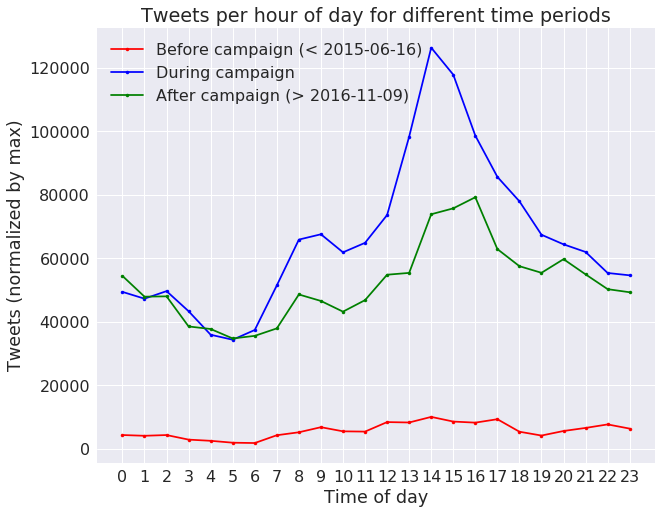

In [59]:
def times_to_hour(tweet_times_series):
    df_temp = tweet_times_series.pivot_table(
                    index=tweet_times_series.index.hour,
                    values='tweet_count', 
                    aggfunc='sum')
    return df_temp

df_b = times_to_hour(times_before)
df_c = times_to_hour(times_compaign)
df_p = times_to_hour(times_pres)

fig3, ax3 = plt.subplots(1,1, figsize=(10,8))
ax3.plot(df_b["tweet_count"], 'r.-')
ax3.plot(df_c["tweet_count"], 'b.-')
ax3.plot(df_p["tweet_count"], 'g.-')
plt.legend(["Before campaign (< 2015-06-16) ", "During campaign", "After campaign (> 2016-11-09)"])
ax3.set_title("Tweets per hour of day for different time periods")
ax3.set_xlabel("Time of day")
ax3.set_ylabel("Tweets (normalized by max)")
plt.xticks(np.arange(24))
plt.show()

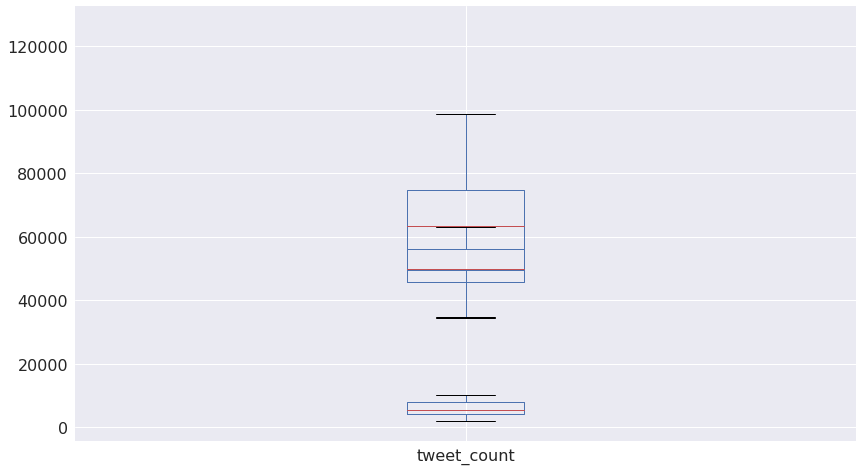

In [60]:
# TODO adjust boxplots 
df_c.boxplot('tweet_count',grid=True,figsize=(14,8))
df_b.boxplot('tweet_count')
df_p.boxplot('tweet_count')

The upper boxplot: after the elections
The boxplot in the middle: during the compaign
The lower boxplot: before the compaign

After the compaign at any hour of the day the number of tweets is higher than the maximum hourly number of tweets during the compaign. The same applies to during the compaign and before it.
This is actually very insightfull. It means the IRA was much less interested in interfering with the political process before Donald Trump announced his candidacy. Then when he did, they strongly increased the tweeting frequency until he won. After the elections, the IRA was even more interested in compromising the public opinion. Of course, this is only an approximation since we don't have the logs of all the IRA's activity but this is a good indicator that they beef up their effort everytime they achieve something (assuming that they backed Donald Trump).

In [61]:
# Let's get the aggregate number of tweets for the 3 time periods for the right trolls and left trolls
df_right = df[(df.account_category=='RightTroll')]
df_left = df[(df.account_category=='LeftTroll')]
tweet_times_right = get_tweet_count(df_right)
tweet_times_left = get_tweet_count(df_left)

times_before_left = tweet_times_left.loc[(tweet_times_left.index < "2015-06-16 00:00:01")]
times_compaign_left = tweet_times_left.loc[(tweet_times_left.index > "2015-06-16 00:00:01") 
                                 & (tweet_times_left.index < "2016-11-09 23:59:59")]
times_pres_left = tweet_times_left.loc[(tweet_times_left.index > "2016-11-09 00:00:01")]

times_before_right = tweet_times_right.loc[(tweet_times_right.index < "2015-06-16 00:00:01")]
times_compaign_right = tweet_times_right.loc[(tweet_times_right.index > "2015-06-16 00:00:01") 
                                 & (tweet_times_right.index < "2016-11-09 23:59:59")]
times_pres_right = tweet_times_right.loc[(tweet_times_right.index > "2016-11-09 00:00:01")]


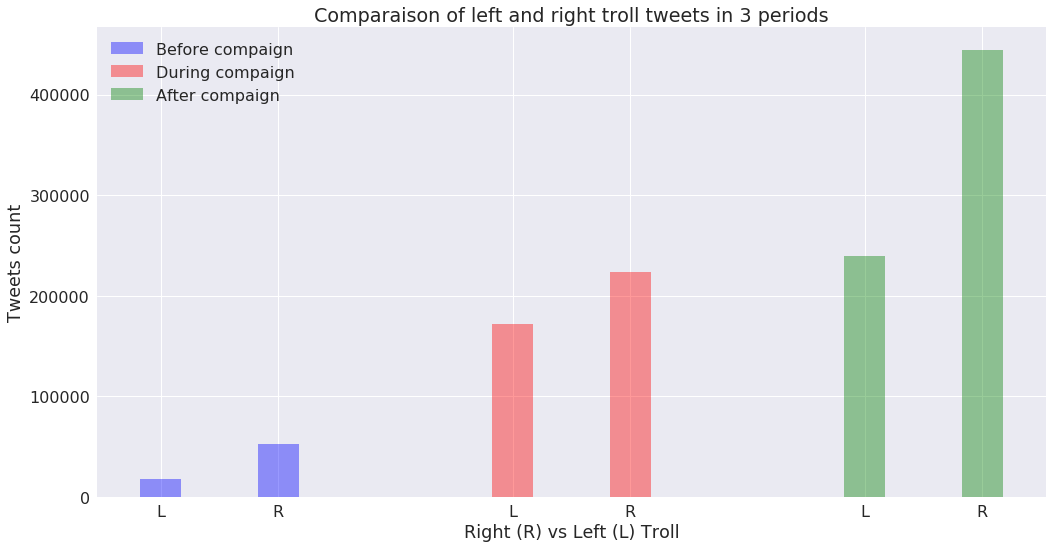

In [62]:
bar_width = 0.35
before_compaign = [len(times_before_left),len(times_before_right)]
during_compaign = [len(times_compaign_left),len(times_compaign_right)]
after_compaign = [len(times_pres_left),len(times_pres_right)]

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(111)
opacity = 0.4
error_config = {'ecolor': '0.3'}
index_1 = [0,1]
index_2 = [3,4]
index_3 = [6,7]
index = index_1+index_2+index_3

ax.bar(index_1, before_compaign, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Before compaign')
ax.bar(index_2, during_compaign, bar_width,
                 alpha=opacity,
                 color='r',
                 label='During compaign')

ax.bar(index_3, after_compaign, bar_width,
                 alpha=opacity,
                 color='g',
                 label='After compaign')



plt.xlabel('Right (R) vs Left (L) Troll')
plt.ylabel('Tweets count')
plt.title('Comparaison of left and right troll tweets in 3 periods')
plt.xticks(index, ('L','R','L','R','L','R'))
plt.legend()

plt.tight_layout()
plt.show()

Overall, the number of tweets by right trolls is larger than the left trolls. The difference grows to almost the double after the elections. The idea here is that left trolls will divide the left and liberal agenda and to some extent give ways for the conservative and right agenda to prevail. After the compaign, this is not anymore the objective. the goal becomes how to better defend the president-elect and discredit his critics.

## Sentiment Analysis

In [32]:
# Let's first tokenize the tweets
tokenized_tweet = df['content'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [have, sitting, Democrat, Senator, trial, corruption, barely, heard, peep, from, mainstream, media]                
1    [Marshawn, Lynch, arrives, game, anti, Trump, shirt, Judging, sagging, pants, shirt, should, Lynch, belt]          
2    [Daughter, fallen, Navy, Sailor, delivers, powerful, monologue, anthem, protests, burns, packers, gear, BoycottNFL]
3    [JUST, President, Trump, dedicates, Presidents, golf, tournament, trophy, people, Florida, Texas, Puerto, Rico]    
4    [RESPECTING, National, Anthem, StandForOurAnthemðŸ]                                                                
Name: content, dtype: object

In [33]:
# Now, we stemm the tokens to their roots
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [have, sit, democrat, senat, trial, corrupt, bare, heard, peep, from, mainstream, media]                 
1    [marshawn, lynch, arriv, game, anti, trump, shirt, judg, sag, pant, shirt, should, lynch, belt]          
2    [daughter, fallen, navi, sailor, deliv, power, monologu, anthem, protest, burn, packer, gear, boycottnfl]
3    [just, presid, trump, dedic, presid, golf, tournament, trophi, peopl, florida, texa, puerto, rico]       
4    [respect, nation, anthem, standforouranthemðÿ]                                                           
Name: content, dtype: object

In [34]:
# Let's join the stemmed words and put them in the dataframe
df['tidy_content'] = tokenized_tweet.apply(' '.join)

In [35]:
df['tidy_content'].head()

0    have sit democrat senat trial corrupt bare heard peep from mainstream media                
1    marshawn lynch arriv game anti trump shirt judg sag pant shirt should lynch belt           
2    daughter fallen navi sailor deliv power monologu anthem protest burn packer gear boycottnfl
3    just presid trump dedic presid golf tournament trophi peopl florida texa puerto rico       
4    respect nation anthem standforouranthemðÿ                                                  
Name: tidy_content, dtype: object

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Topic Analysis

Given a dataset of tweets we would like to extract, for each tweet, each related topic. More so our idea is to associate such topics to specific windows of time and events which happened on that period. We are expecially interested in the evaluation of the period before, during and after the US presidential campain of 2016, where Trump took office as the 45th President on January 20, 2017. 
In order to simplify the topic extraction we will focus on the three months, one before the campain, one during the campain and the last one after the campain, where the number of tweets are the highest with respect to all the other months. These months were extracted during the Exploratory Analysis for the Russia dataset. 

We will proceed by topic extraction of the following dataset:

 - russian troll tweets
 - iranian troll tweets 
 - general public

For the first dataset, which is the russian one, we will distinguished among right, left trolls and right with left trolls analyzed all together. This procedure is possible since each russian troll tweet is labeled with respect to the latter information. Such an analysis will give us an overall evaluation of the topics trend for different categories of trolls. In particular the questions we are interested to answer in this stage are the following:
    
 - Are the topics for the left and the right tweets meaningful? 
 - Are the topics for the left and the right tweets similar or do they are different? 
 - Do we extract more information by analyzing the left and right tweets all together? 
 
After this analysis we will consider the iranian dataset. For the latter, the analysis of the entire dataframe, not distinguish between left and right trolls, is done. Indeed the iranian tweets are not labeled with respect to the trolls categories. The main questions we would like to address in this part of the work are the following:

 - Are there differences among iranian tweets in the three different periods (e.g. before, during and after the campain)?
 - Are the iranian tweets consistent in the different periods with respect to the russian ones?
 
Finally we looked at a specific event, which is the Charlottesville car attack on August 12, 2017. For this event the entire month of August 2017 has been analyzed for russian and iranian troll's tweets. More so we also extracted a tweets dataset related to general public for August 2017. Here we are interested in answering the following questions:

 - Can we find in each dataset the expected topic, which is the Charlottesville car attack?
 - Are the other topic for each dataset, e.g. russian, irianian and general public tweets, consistent?
 
The analysis is structured as follows:

 - Definition of functions for for the topic analysis
 - Russian trolls tweets analysis
 - Iranian trolls tweets analusis
 - General public analysis
 
It is important to underline that, although a consistent procedure has been adopted there is some heuristics in the topic label assignment for each sequence of keywords which is related to the personal evaluation of the human operator. More so the topic extraction in this context is more challenging since the dataset is related to the same big topic, which is mainly politics, and the overlap among some subtopics is always present. 

## Functions for topics analysis

Given a dataset of tweets we would like to extract, for each tweet, the related topics. More so our idea is to associate such topics to specific windows of time and events which happened on that period. We are expecially interested in the evaluation of the period before, during and after the US presidential campain of 2016, where Trump took office as the 45th President on January 20, 2017. 

In order to do so we decided to use Latent Dirichlet Allocation (LDA) that is a popular algorithm for topic modeling. We run LDA using TF-IDF as a way of screening features/words to then use in the LDA. TF-IDF (term frequency–inverse document frequency) is a scoring method used to calculate the frequency of a particular term in the target tweet with the consideration of the scarcity of that particular term in other tweets.

The main challenge is how to extract good quality of topics that are clear and meaningful. 
This point is mainly related to:
1. quality of text processing
2. strategy of finding an optimal amount of topics.

We first start by the text processing. 
Five main steps have been performed:  
1. Tokenization  
2. Filtering tokens 
3. Removing all the stopwords
4. Lemmatization 
5. Stemming 


In the first place we needed to split the text of each tweet into sentences and the sentences into words (Tokenization). Lowercase the words and remove punctuation.
After that we filter tokens that appear in less than 15 documnets or more than 0.5 documents. More so we decided to keep only the first 100000 most frequent tokens. For each document we create a tf-idf model. 
Once the "TF-IDF" model has been created, we could train our LDA model. In this way for each topic, we will explore the words occuring in that topic and its relative weight. 

The most tricky part, according to us, is the definition of the number of the topic to be used in the LDA training. In order to do this two main approaches will be used:
1. Checking a specfic number of topics that we think we should find in our dataset, training the LDA and subjectively inspecting the validity of the final groups (e.g. topics), possibly iterating the process with another amount of topics.
2. Definig scores that can help us in automatically identify the correct number of topics, inspecting the final result to check whether it makes sense.

We tested the second strategy and in particular topic coherence was used (https://rare-technologies.com/what-is-topic-coherence/) which provide a convenient measure to judge how good a given topic model is. However, also in this case, the human expert will be afterwards in charge of evaluating the final result.

We import also some stopwords in the form fo a .json file

In [3]:
import json
with open('stopwords_joined.json', 'r') as f:
         stopwords2 = json.load(f)
with open('stopwords_3.json', 'r') as f:
         stopwords3 = json.load(f)
with open('stopwords_4.json', 'r') as f:
         stopwords4 = json.load(f)

In [4]:
punctuation = list(string.punctuation)
en_stop = stopwords.words('english') + punctuation + ["rt", "via"]+stopwords2+stopwords3+stopwords4

Let's define some functions for the topic analysis

In [5]:
# Lemmatization
def lemmatize_stemming(text):
    return wordnet_lemmatizer.lemmatize(text, pos="v")

In [6]:
# Preprocessing fro creating tokens
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        token = lemmatize_stemming(token)
        if token not in en_stop and len(token) > 4:
            result.append(token)
    return result

In [7]:
# function for creating dictionary and a bag of words (bow_corpus)
def create_dictionary(document):
    """
    "document" is a dataframe with the column of tweets we want to analyze.
    Usage : docs, dictionary, bow_corpus = create_dictionary(df)
    """

    # We add an index column
    data_text= document
    data_text['index'] = document.index
    documents = data_text
    # Process the doc text, saving the result as "processed_docs" 
    docs = documents[documents.columns.values[0]].map(preprocess)
    dictionary = Dictionary(docs)
    # Remove rare and common tokens.
    # Filter out words that occur too frequently or too rarely.
    max_freq = 0.5
    min_wordcount = 5
    dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

    # Bag-of-words representation of the documents.
    bow_corpus = [dictionary.doc2bow(doc) for doc in docs]
    
    return docs, dictionary, bow_corpus


In [8]:
def compute_coherence_values(processed_docs, dictionary, bow_corpus , limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    processed_docs
    dictionary
    bow_corpus
    doc : Gensim dictionary
    limit : Max num of topics
    start: initial number of topics
    step: incremental step of number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    
    Usage:
    --------
    model_list, coherence_values_list = compute_coherence_values(processed_docs, dictionary, bow_corpus, 3, start=2, step=1)
    """
    coherence_values_list = []
    model_list = []
    proces_docs = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        params = {'passes': 10, 'random_state': seed}
        
        #Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, 
        #then apply transformation to the entire corpus and call it ‘corpus_tfidf’. 
        #Finally we preview TF-IDF scores for our first document.
        tfidf = models.TfidfModel(bow_corpus)
        corpus_tfidf = tfidf[bow_corpus]
        lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary, passes=params['passes'], workers=6)

        #Compute coherence
        coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        model_list.append(lda_model)
        coherence_values_list.append(coherence_lda)#(score2)


    return model_list, coherence_values_list

In [9]:
#function to show the model (if needed)
def show_models(model_list, coherence_values,  limit, start, step):
    # Show graph
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [10]:
#function to create a dataframe of tweets associated to a specific topic and relative topic keywords 
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [11]:
# function to compute topics
def topic_compute(dictionary, docs, data_text, bow_corpus, max_topic_num, min_topic_num, step_size):
    model_list, coherence_values = compute_coherence_values(docs, dictionary, bow_corpus, max_topic_num, min_topic_num, step_size)
    print(coherence_values)
    m = max(coherence_values)
    #show_models(model_list, coherence_values,10, 2, 1 ) #15 2, 1
    index = [i for i, j in enumerate(coherence_values) if j == m]
    print(index)
    lda_model = model_list[index[0]]
    
    # Convert to list
    data = data_text[data_text.columns[0]].values.tolist()
    print('converted to list')
    df_topic_sents_keywords = format_topics_sentences(lda_model, bow_corpus, data)
    print('df_topic_sents_keywords')
    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    print('df_dominant_topic')
    # Number of Documents for Each Topic
    topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
    print('topic_counts')
    # Percentage of Documents for Each Topic
    #topic_contribution = round(topic_counts/topic_counts.sum(), 4)

    return model_list, coherence_values, df_topic_sents_keywords, topic_counts, index #topic, topic_contribution

In [12]:
# function to show list of topics
def topic_show(topic_contribution, df_topic_sents_keywords):
        # Topic Number and Keywords
    topic_keywords = [0] * len(topic_contribution)
    for i in range(0, len(topic_contribution)):
        temp = df_topic_sents_keywords[df_topic_sents_keywords['Dominant_Topic']== i]
        topic_keywords[i] = temp.iloc[0]['Topic_Keywords']
        #print(temp.iloc[0]['Topic_Keywords'])
    df_topic_keywords = pd.DataFrame(topic_keywords, columns=['keywords'])
    topic = [0] * len(topic_contribution)
    for i in range(0, len(topic_contribution)):
        print(topic_keywords[i].split(",")[0:5])
        #topic[i] = input("prompt")
        
    return topic_keywords#topic, topic_contribution

In [13]:
# function to print topics (if needed)
def topic_print(topic, topic_contribution, title):
    length = len(topic_contribution)
    start = 0
    x = list(range(start, start+length))
    y = topic_contribution.values

    plt.bar(x, y, align='center')
    plt.xticks(x, topic)
    fig_size = [0]*2
    fig_size[0] = 24
    fig_size[1] = 22
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 10}

    plt.rc('font', **font)
    plt.rcParams["figure.figsize"] = fig_size
    plt.title(title)
    #text(x, y, s, fontsize=12)
    plt.show()
    

In [14]:
# function to run all the necessary procedure
def process_data (data_text, docs, dictionary, bow_corpus):
    model_list, coherence_values, df_topic_sents_keywords, topic_counts, index = topic_compute(dictionary, docs, data_text, bow_corpus, max_topic_num, min_topic_num, step_size)
    topic_contribution = (topic_counts/topic_counts.sum()).astype(float)
    show_models(model_list, coherence_values,max_topic_num, min_topic_num, step_size)
    topic_show(topic_contribution, df_topic_sents_keywords)
    return df_topic_sents_keywords, model_list, index

In [15]:
# function for extracting the tweets with highest score related to each topic
def representativeTweets(df_topic_sents_keywords):
    # Group top 5 sentences under each topic
    sent_topics_sorteddf_mallet = pd.DataFrame()

    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                 grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                                axis=0)

    # Reset Index    
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

    # Show
    return sent_topics_sorteddf_mallet

For simplicity, in the next parts we will only show the topic extraction for one dataframe (right trolls before campain), the rest has been commented out. Anyways the results can be found in the data story.

## Russian troll's tweets

In [16]:
df = pd.read_csv('df_extended.csv',engine='python').drop(['Unnamed: 0'],axis=1)
# Filter data with respect to English language
df_reduced = df[(df['language']=='English')]

# Filter data with respect to the month and year
# I create as many dictonary as the number of years 
year_2017 = {}
year_2016 = {}
year_2015 = {}

months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Each dictonary contains for each month a dataset filtered from df with respect to the month and the year
for month in months:
    year_2017[month] = df_reduced[(df_reduced['year']==2017)]
    year_2017[month] = year_2017[month][year_2017[month]['month']==int(month)]
    year_2016[month] = df_reduced[(df_reduced['year']==2016)]
    year_2016[month] = year_2016[month][year_2016[month]['month']==int(month)]
    year_2015[month] = df_reduced[(df_reduced['year']==2015)]
    year_2015[month] = year_2015[month][year_2015[month]['month']==int(month)]

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/_pytest/fixtures.py:846: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


In [17]:
# let's define the dataframe with respect to the interested period. The period (month+year) are the one with highest 
# number of tweets before, during and after the campain.
df_before = year_2015['6']
df_during = year_2016['10']
df_after = year_2017['8']

We then distinguish between left and right trolls.

In [18]:
df_before_campain_right = df_before[df_before['account_category'] == 'RightTroll'][['content']].applymap(str)
df_before_campain_left = df_before[df_before['account_category'] == 'LeftTroll'][['content']].applymap(str)
df_before_campain_all = df_before[['content']].applymap(str)

In [19]:
df_after_campain_right = df_after[df_after['account_category'] == 'RightTroll'][['content']].applymap(str)
df_after_campain_left = df_after[df_after['account_category'] == 'LeftTroll'][['content']].applymap(str)
df_after_campain_all = df_after[['content']].applymap(str)

In [20]:
df_during_campain_right = df_during[df_during['account_category'] == 'RightTroll'][['content']].applymap(str)
df_during_campain_left = df_during[df_during['account_category'] == 'LeftTroll'][['content']].applymap(str)
df_during_campain_all = df_during[['content']].applymap(str)

The parameter of the topic extraction should be now set. We are indeed going to explore several number of topic combinations in order to find the number of topics which gives us the highest coherence related to the topic itself. As maximum amount of topics we decided not to go over a number of 40 on one hand because of computational reasons and also because we believe that 40 topics in one month all related to politics would be enough to have an overview of the hottests considered topics in that month. 

In [21]:
# Topic extraction parameters
max_topic_num = 40
min_topic_num = 2
step_size = 2

#### Before the campain


##### Right Trolls

For the analysis of the tweets' topic we will focus on May 2015, which has been shown to be the month before the campain with the highest amount of tweets. 

In [22]:
#Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_before_campain_right
data_text.head()

,content
29864,details revealed police shooting year Tamir Rice
29865,News Stay safe beach with Maui County Ocean Safety Guide
29866,Report Teams that snuck fake bombs past were specially trained
29867,More proof that Taylor Swift nicest woman world
29868,Woman with rare case traveled Tenessee other states health officals


We now process the data, computing for different number of topics the "Coherence". A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts.

In [23]:
docs_before_campain_right, dictionary_before_campain_right, bow_corpus_before_campain_right = create_dictionary(data_text)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
[0.43117263891470387, 0.44531126068024895, 0.4868995143606772, 0.49546177460135454, 0.5450606200020808, 0.5163181407229139, 0.5544400031286675, 0.560334384779956, 0.5614417430598845, 0.5652819070442379, 0.5690880028207513, 0.551783065679076, 0.5663904555414748, 0.5673303387326935, 0.5787980457026267, 0.586268885724065, 0.5846273566342883, 0.5816615364698893, 0.5841093249247343]
[15]
converted to list
df_topic_sents_keywords
df_dominant_topic
topic_counts


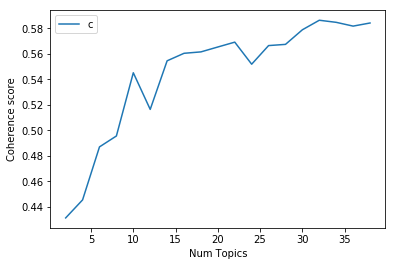

['money', ' children', ' government', ' nbafinals', ' elect']
['pjnet', ' wakeupamerica', ' carolina', ' block', ' trust']
['follow', ' respect', ' mckinney', ' baltimore', ' country']
['force', ' women', ' snowden', ' confederate', ' plane']
['tweet', ' iraqvol', ' obama', ' friend', ' prison']
['sport', ' warriors', ' hillary', ' funny', ' drive']
['remember', ' constitution', ' public', ' climate', ' detroit']
['question', ' problem', ' decide', ' personal', ' speed']
['surveillanceday', ' obama', ' charleston', ' patriot', ' mother']
['office', ' perry', ' obama', ' rednationrising', ' trade']
['throw', ' flood', ' israel', ' obama', ' chinese']
['interest', ' spend', ' waste', ' garner', ' jennifer']
['obama', ' barack', ' president', ' trump', ' donald']
['phone', ' obama', ' control', ' terrorists', ' black']
['smoke', ' perfect', ' selfie', ' terrorist', ' obama']
['unite', ' change', ' county', ' nuclear', ' woman']
['shoot', ' injure', ' break', ' police', ' chicago']
['sleep

In [36]:
df_topic_sents_keywords, model_list_before_campain_right, index = process_data (data_text, docs_before_campain_right, dictionary_before_campain_right, bow_corpus_before_campain_right)

We use the pick of coherence to choose the necessary number of topic for the specific dataset.

In [37]:
# we extract the dataframe containg for each tweet the corresponding topic and the relative keywords
df_topic_sents_keywords_before_campain_right = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_right)

In [38]:
#Main transformation functions for preparing LDAdata to the visualization's data structures
lda_model = model_list_before_campain_right[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_before_campain_right, dictionary_before_campain_right)
pyLDAvis.save_html(vis, 'lda_before_campain_right_russia.html')

##### Left Trolls

The same procedure of above is repeted for the different datasets.

In [39]:
#Definition of the variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_before_campain_left
data_text.head()

,content
13863,Police searching gunman opened fire killed nine people historic African American church HateCrime
13864,hard believe that people were killed South Carolina HateCrime
25319,going subway because this
25320,that insane should have least some moral principles
26846,they


In [40]:
docs_before_campain_left, dictionary_before_campain_left, bow_corpus_before_campain_left = create_dictionary(data_text)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
[0.5663412160177349, 0.5693974136075587, 0.5563877547631447, 0.5464042280995678, 0.5910573604509917, 0.5900443527371177, 0.594721415500428, 0.6310977313973793, 0.6163289415944717, 0.6342893842264414, 0.6297603845795998, 0.6483557370427737, 0.6526809138134647, 0.6373770704040729, 0.6457774052444819, 0.652359977813848, 0.6583636991966385, 0.660410125193848, 0.6636309108303857]
[18]
converted to list
df_topic_sents_keywords
df_dominant_topic
topic_counts


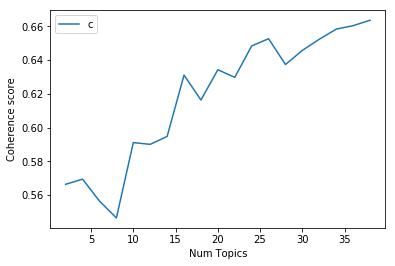

['hillary', ' internet', ' summer', ' admit', ' phoenix']
['challenge', ' newyork', ' market', ' prison', ' nuclear']
['trade', ' election', ' detroit', ' light', ' violence']
['memphis', ' injury', ' washington', ' honor', ' greece']
['wakeupamerica', ' pjnet', ' sport', ' happen', ' people']
['report', ' share', ' troop', ' resign', ' russia']
['power', ' government', ' judge', ' sentence', ' remember']
['business', ' university', ' sport', ' victim', ' cavaliers']
['sanjose', ' security', ' video', ' price', ' freedom']
['white', ' learn', ' train', ' break', ' liberal']
['local', ' change', ' climate', ' raise', ' kansas']
['charge', ' college', ' death', ' david', ' surprise']
['americans', ' season', ' robbery', ' ukraine', ' topvideo']
['obama', ' doctor', ' wiunion', ' country', ' strategy']
['driver', ' lightning', ' catch', ' republicans', ' police']
['attack', ' bruce', ' jenner', ' friend', ' project']
['shoot', ' clinton', ' blackhawks', ' chicago', ' speak']
['chicago', '

In [41]:
df_topic_sents_keywords, model_list_before_campain_left, index = process_data (data_text, docs_before_campain_left, dictionary_before_campain_left, bow_corpus_before_campain_left)

In [42]:
df_topic_sents_keywords_before_campain_left = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_right)

In [43]:
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9031,"money, children, government, nbafinals, elect, stephen, curry, cross, governor, sound",angiis BREAKING Death Penalty Woman KILLED Year Cousin
1,1.0,0.9031,"pjnet, wakeupamerica, carolina, block, trust, obama, north, uniteblue, shark, south",theredmachine cherylduitsman BarbMuenchen would Republican protested everyday
2,2.0,0.9031,"follow, respect, mckinney, baltimore, country, obama, racism, reason, advice, francisco",amberli BREAKING Force Responds North Korea amber
3,3.0,0.9031,"force, women, snowden, confederate, plane, obama, report, review, justice, viagra",BREAKING Jong Just Backed Down
4,4.0,0.9308,"tweet, iraqvol, obama, friend, prison, troop, stupid, battle, univision, divide",InGodIDoTrust easily forgive child afraid dark real tragedy life when liberal afraid
5,5.0,0.9308,"sport, warriors, hillary, funny, drive, photos, patriots, clinton, atlanta, finals",tisda Lemon DESPERATELY Tries Downplay Antifa Violence
6,6.0,0.9119,"remember, constitution, public, climate, detroit, worth, double, legislature, notice, blame",adsnn BREAKING Dead Injured State Emergency Declared adns
7,7.0,0.8924,"question, problem, decide, personal, speed, style, stand, obama, technology, manage",Pelosi Demands Confederate Statues Removed From Capitol Paul Ryan Shuts Down Hard
8,8.0,0.9031,"surveillanceday, obama, charleston, patriot, mother, future, guess, create, girls, child",ramin_parsa DougSides former Muslim Islam very evil Islam combination Nazism facisim social
9,9.0,0.9031,"office, perry, obama, rednationrising, trade, grind, obamacare, state, killtpa, ahead",amberli Traitor Jeff Flake Getting HAMMERED From Sides amber


In [44]:
lda_model = model_list_before_campain_left[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_before_campain_left, dictionary_before_campain_left)
pyLDAvis.save_html(vis, 'lda_before_campain_left_russia.html')

In [45]:
#TDefinition of variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_before_campain_all
data_text.head()

,content
13863,Police searching gunman opened fire killed nine people historic African American church HateCrime
13864,hard believe that people were killed South Carolina HateCrime
25319,going subway because this
25320,that insane should have least some moral principles
26846,they


In [46]:
docs_before_campain_all, dictionary_before_campain_all, bow_corpus_before_campain_all = create_dictionary(data_text)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
[0.3838188281110884, 0.4235651800217222, 0.47965259778405134, 0.4620179572572237, 0.5047772616545458, 0.5256098778700034, 0.5313368848360633, 0.545527839732761, 0.5350721567649076, 0.5490244200021233, 0.5576197976040875, 0.5587307949961052, 0.5634063844138828, 0.5582870607281228, 0.5686466222086902, 0.5780565422241724, 0.5724603183955074, 0.5790308802446318, 0.5750353843421566]
[17]
converted to list
df_topic_sents_keywords
df_dominant_topic
topic_counts


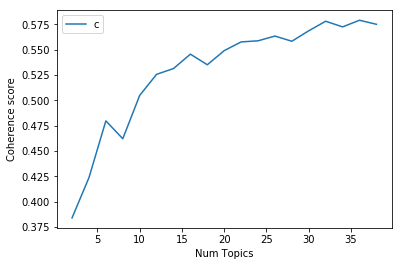

['respect', ' naked', ' miami', ' blackhawks', ' rescue']
['iraqvol', ' catch', ' night', ' draft', ' mother']
['rednationrising', ' worst', ' remember', ' violence', ' obama']
['action', ' valley', ' obama', ' higher', ' stake']
['christie', ' email', ' chris', ' detroit', ' mckinney']
['conservative', ' difference', ' raise', ' pizza', ' throw']
['barack', ' people', ' obama', ' sharpton', ' future']
['obama', ' trade', ' democrats', ' perfect', ' voters']
['michelle', ' obama', ' europe', ' summer', ' dream']
['follow', ' hillary', ' power', ' clinton', ' crash']
['spend', ' spring', ' atlanta', ' waste', ' brother']
['local', ' baltimore', ' sandiego', ' chicago', ' homicides']
['money', ' romney', ' jenner', ' caitlyn', ' california']
['father', ' sleep', ' sound', ' obama', ' military']
['pjnet', ' wakeupamerica', ' change', ' graham', ' climate']
['charleston', ' control', ' reveal', ' shoot', ' obama']
['white', ' racism', ' record', ' obama', ' public']
['obama', ' president',

In [47]:
df_topic_sents_keywords, model_list_before_campain_all, index = process_data (data_text, docs_before_campain_all, dictionary_before_campain_all, bow_corpus_before_campain_all)

In [48]:
df_topic_sents_keywords_before_campain_all = df_topic_sents_keywords

In [49]:
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_all)

In [50]:
lda_model = model_list_before_campain_all[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_before_campain_all, dictionary_before_campain_all)
pyLDAvis.save_html(vis, 'lda_before_campain_all_russia.html')

#### During The Campain

##### Right Trolls

In [51]:
#Definition of variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_during_campain_right
data_text.head()

,content,index
56725,bomb squad arriving Bellingham Intl Airport Screeners positive swab explosives checking,56725
56726,more finished than Bill Clinton after Gennifer Flowers scandal wishing true doesn make true,56726
56727,Another insane baseless proclamation Clinton bagman Robby Mook this morning Face Nation,56727
56728,LivingOnChi HAGOODMANAUTHOR WIKILEAKS GUCCIFER EMAILS Media Working Directly With Hillary Clinton Campaign,56728
56729,LivingOnChi HAGOODMANAUTHOR WIKILEAKS GUCCIFER EMAILS Media Working Directly With Hillary Clinton,56729


In [52]:
docs_during_campain_right, dictionary_during_campain_right, bow_corpus_during_campain_right = create_dictionary(data_text)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
[0.2457458064418601, 0.3009919584890063, 0.35034656468111763, 0.36734300897482564, 0.38478076896411706, 0.4012312534031551, 0.4255126516022784, 0.4466741036145876, 0.46091802572250706, 0.46302248910965427, 0.47963607113082535, 0.4983276461223251, 0.5004083285446858, 0.5079329823046493, 0.5057471324144099, 0.5319893126062998, 0.5278726504427831, 0.5375365674068967, 0.537380845409484]
[17]
converted to list
df_topic_sents_keywords
df_dominant_topic
topic_counts


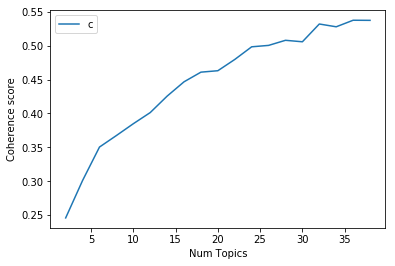

['tweet', ' trust', ' enlist', ' explain', ' nevertrump']
['obama', ' state', ' judge', ' gettysburg', ' brazile']
['trump', ' honor', ' washington', ' crimes', ' hillary']
['retweet', ' latest', ' clinton', ' weather', ' disaster']
['break', ' hillary', ' votetrump', ' crookedhillary', ' syria']
['target', ' account', ' iceisis', ' opiceisis', ' racist']
['pence', ' night', ' criminal', ' november', ' deplorable']
['create', ' hillarybecause', ' clinton', ' press', ' hillary']
['debate', ' reveal', ' veterans', ' clinton', ' update']
['raise', ' court', ' foundation', ' prison', ' clinton']
['soros', ' george', ' texas', ' assange', ' donate']
['question', ' follow', ' answer', ' crook', ' statement']
['party', ' steal', ' republican', ' clear', ' hillary']
['matter', ' putin', ' islam', ' refugees', ' americans']
['rally', ' texit', ' statewide', ' participate', ' schedule']
['kelly', ' megyn', ' hannity', ' control', ' action']
['donald', ' trump', ' bless', ' halloween', ' country'

In [53]:
df_topic_sents_keywords, model_list_during_campain_right, index = process_data (data_text, docs_during_campain_right, dictionary_during_campain_right, bow_corpus_during_campain_right)

In [54]:
df_topic_sents_keywords_during_campain_right = df_topic_sents_keywords

In [55]:
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_right)

In [56]:
lda_model = model_list_during_campain_right[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_during_campain_right, dictionary_during_campain_right)
pyLDAvis.save_html(vis, 'lda_during_campain_right_russia.html')

In [57]:
##### Left Trolls

In [58]:
#Definition of variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_during_campain_left
data_text.head()

,content
784,Colin Kaepernick start this Sunday Francisco
785,
786,CRAZY child small fine court adult prison instead FinesAndFees
787,when time code switch interview AtlantaFX
788,RECORD SCRATCH FREEZE FRAME AMERICA that probably wondering myself into this


In [59]:
docs_during_campain_left, dictionary_during_campain_left, bow_corpus_during_campain_left = create_dictionary(data_text)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
[0.423659524752825, 0.5033071978114736, 0.4727626595307129, 0.49677679400510005, 0.5039044467639049, 0.5279347791254346, 0.5123490393099809, 0.5304709690875853, 0.544322878311245, 0.5425834860812303, 0.5595425176107303, 0.5824708005755181, 0.5885858651989218, 0.5853079262128611, 0.5921446790517969, 0.6089837196486896, 0.6133363815112299, 0.6003806144872466, 0.6103751712742361]
[16]
converted to list
df_topic_sents_keywords
df_dominant_topic
topic_counts


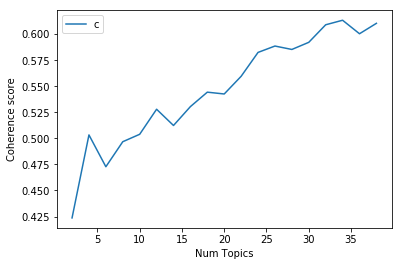

['question', ' interview', ' podcast', ' prove', ' promo']
['friend', ' clown', ' article', ' black', ' billy']
['nowplaying', ' dagrfm', ' weekend', ' water', ' hiphop']
['retweet', ' moment', ' saturday', ' supporters', ' breathe']
['reason', ' father', ' pipeline', ' petition', ' angry']
['nigga', ' funny', ' htgawm', ' parent', ' account']
['soundcloud', ' mixtape', ' jesus', ' cover', ' youtube']
['black', ' police', ' hours', ' policebrutality', ' miami']
['video', ' heart', ' sleep', ' nodapl', ' young']
['money', ' demand', ' agree', ' connect', ' husband']
['justice', ' dance', ' project', ' discuss', ' state']
['debate', ' hillary', ' remember', ' trump', ' clinton']
['follow', ' twitter', ' happen', ' trust', ' drink']
['america', ' respect', ' original', ' major', ' promotion']
['facebook', ' pretty', ' explain', ' girls', ' kaepernick']
['small', ' gotta', ' bitch', ' dream', ' charge']
['change', ' chicago', ' single', ' indigenous', ' drive']
['cartoon', ' point', ' pict

In [60]:
df_topic_sents_keywords, model_list_during_campain_left, index = process_data (data_text, docs_during_campain_left, dictionary_during_campain_left, bow_corpus_during_campain_left)

In [61]:
df_topic_sents_keywords_during_campain_left = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_left)

In [62]:
lda_model = model_list_during_campain_left[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_during_campain_left, dictionary_during_campain_left)
pyLDAvis.save_html(vis, 'lda_during_campain_left_russia.html')

##### All Trolls

In [ ]:
We are commenting here some code. We are providing the facts that we observer while we running the code

In [ ]:
'''#Definition of variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_during_campain_all
data_text.head()
docs_during_campain_all, dictionary_during_campain_all, bow_corpus_during_campain_all = create_dictionary(data_text)
df_topic_sents_keywords, model_list_during_campain_all, index = process_data (data_text, docs_during_campain_all, dictionary_during_campain_all, bow_corpus_during_campain_all)
df_topic_sents_keywords_during_campain_all = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_all)
lda_model = model_list_during_campain_all[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_during_campain_all, dictionary_during_campain_all)
pyLDAvis.save_html(vis, 'lda_during_campain_all_russia.html') '''

#### After Campain

##### Right Trolls

In [3]:
#Definition of variables
'''
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_after_campain_right

data_text.head()
docs_after_campain_right, dictionary_after_campain_right, bow_corpus_after_campain_right = create_dictionary(data_text)
df_topic_sents_keywords, model_list_after_campain_right, index = process_data (data_text, docs_after_campain_right, dictionary_after_campain_right, bow_corpus_after_campain_right)
df_topic_sents_keywords_after_campain_right = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_right)
lda_model = model_list_after_campain_right[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_after_campain_right, dictionary_after_campain_right)
pyLDAvis.save_html(vis, 'lda_after_campain_right_russia.html')

''' 

'\ndata_text = []\ndocs = []\ndictionary = []\nbow_corpus = []\nmodel_list = []\ncoherence_values= []\ndf_topic_sents_keywords = []\ntopic_contribution = []\ndata_text = df_after_campain_right\n\ndata_text.head()\n'

##### Left trolls

In [ ]:
'''  #Test testTweets
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_after_campain_left
data_text.head() 
docs_after_campain_left, dictionary_after_campain_left, bow_corpus_after_campain_left = create_dictionary(data_text)
df_topic_sents_keywords, model_list_after_campain_left, index = process_data (data_text, docs_after_campain_left, dictionary_after_campain_left, bow_corpus_after_campain_left)
df_topic_sents_keywords_after_campain_left = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_left)
lda_model = model_list_after_campain_left[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_after_campain_left, dictionary_after_campain_left)
pyLDAvis.save_html(vis, 'lda_after_campain_left_russia.html')

''' 

##### All Trolls

In [ ]:
''' #Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_after_campain_all
data_text.head()
docs_after_campain_all, dictionary_after_campain_all, bow_corpus_after_campain_all = create_dictionary(data_text)
df_topic_sents_keywords, model_list_after_campain_all, index= process_data (data_text, docs_after_campain_all, dictionary_after_campain_all, bow_corpus_after_campain_all)
df_topic_sents_keywords_after_campain_all = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_all)
lda_model = model_list_after_campain_all[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_after_campain_all, dictionary_after_campain_all)
pyLDAvis.save_html(vis, 'lda_after_campain_all_russia.html')
  '''



## Iranian tweets

Iranian tweets are not labeled as rigth/left so we will analyze all the dataset for each perios (before, during and after the campain)

In [ ]:
 '''df = pd.read_csv('df_extended_iran.csv',engine='python')
# Filter data with respect to English language
df_reduced = df[(df['tweet_language']=='en')]

# Filter data with respect to the month and year
# I create as many dictonary as the number of years 
year_2017 = {}
year_2016 = {}
year_2015 = {}

months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Each dictonary contains for each month a dataset filtered from df with respect to the month and the year
for month in months:
    year_2017[month] = df_reduced[(df_reduced['year']==2017)]
    year_2017[month] = year_2017[month][year_2017[month]['month']==int(month)]
    year_2016[month] = df_reduced[(df_reduced['year']==2016)]
    year_2016[month] = year_2016[month][year_2016[month]['month']==int(month)]
    year_2015[month] = df_reduced[(df_reduced['year']==2015)]
    year_2015[month] = year_2015[month][year_2015[month]['month']==int(month)]  '''

In [ ]:
 '''# let's define the dataframe with respect to the interested period. The period (month+year) are the one with highest 
# number of tweets before, during and after the campain.
df_before = year_2015['6']
df_during = year_2016['10']
df_after = year_2017['8']

df_before = df_before[['tweet_text']].applymap(str)
df_during = df_during[['tweet_text']].applymap(str)
df_after = df_after[['tweet_text']].applymap(str)

'''

#### Before Campain

In [ ]:
''' #Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_before
data_text.head()  '''

In [ ]:
#docs_before, dictionary_before, bow_corpus_before = create_dictionary(data_text)

In [ ]:
#df_topic_sents_keywords, model_list_before, index= process_data (data_text, docs_before, dictionary_before, bow_corpus_before)

In [ ]:
'''df_topic_sents_keywords_before = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before)
lda_model = model_list_before[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_before, dictionary_before)
pyLDAvis.save_html(vis, 'lda_before_campain_all_iran.html')
#Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_during
data_text.head()
docs_during, dictionary_during, bow_corpus_during = create_dictionary(data_text)
df_topic_sents_keywords, model_list_during, index= process_data (data_text, docs_during, dictionary_during, bow_corpus_during)
df_topic_sents_keywords_during = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during)
lda_model = model_list_during[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_during, dictionary_during)
pyLDAvis.save_html(vis, 'lda_during_campain_all_iran.html')
''' 

#### After Campain

In [ ]:
''' #Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_after
data_text.head()
docs_after, dictionary_after, bow_corpus_after = create_dictionary(data_text)
df_topic_sents_keywords, model_list_after, index= process_data (data_text, docs_after, dictionary_after, bow_corpus_after)
df_topic_sents_keywords_after = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after)
lda_model = model_list_after[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_after, dictionary_after)
pyLDAvis.save_html(vis, 'lda_after_campain_all_iran.html')


## General public tweets

For the general public tweets we only check the period of August 2017, in order to find out whether there is as topic the Charlottesville attack.

In [ ]:
''' df = pd.read_csv('dfnew.csv',engine='python')
df_pub= df[['text']].applymap(str)
df_pub.head()
#Define variables
data_text = []
docs = []
dictionary = []
bow_corpus = []
model_list = []
coherence_values= []
df_topic_sents_keywords = []
topic_contribution = []
data_text = df_pub
data_text.head()
docs_general_pub, dictionary_general_pub, bow_corpus_general_pub = create_dictionary(data_text)
model_list_general_pub, coherence_values, df_topic_sents_keywords, topic_counts, index = topic_compute(dictionary_general_pub, docs_general_pub, data_text, bow_corpus_general_pub, 20, 2, 2)
topic_contribution_general_pub = (topic_counts/topic_counts.sum()).astype(float)
show_models(model_list_general_pub, coherence_values,20, 2, 2)
topic_show(topic_contribution_general_pub, df_topic_sents_keywords)
df_topic_sents_keywords_general_public = df_topic_sents_keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_general_public)
lda_model = model_list[index[0]]
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,  bow_corpus_general_pub, dictionary_general_pub)
pyLDAvis.save_html(vis, 'lda_general_public.html') ''' 


## Analysis

In the first part of the analysis related to the russian troll's tweet we would like to adress the following questions:
 - Are the topics for the left and the right tweets meaningful? 
 - Are the topics for the left and the right tweets similar or do they are different? 
 - Do we extract more information by analyzing the left and right tweets all together? 

In order to do so we are going to create a dataframe containing the keywords for the right, left and all together toll's tweets in the three different time periods, which are before, during and after the campain.

In [ ]:
'''# Before the campain 
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_right)
before_campaign = pd.DataFrame()
before_campaign['before_campaign_right_russia']=sent_topics_sorteddf_mallet.Keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_left)
before_campaign['before_campaign_left_russia'] = sent_topics_sorteddf_mallet.Keywordssent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_all)
before_campaign['before_campaign_all_russia'] = sent_topics_sorteddf_mallet.Keywords

sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before_campain_all)
before_campaign['before_campaign_all_russia'] = sent_topics_sorteddf_mallet.Keywords

'''

For the so called "before campain" period, right and left tweets topic analysis shows a nice picture of the principle events of June 2015. They are therefore very meaningful by themselves. If one look at right and left trolls separately, some interesting evaluation can be done.
First of all the number of topics covered by the right trolls is longer than the one of the left. More so, in terms of political themes, the right trolls are more active, in particular Obama is highly cited from the left and the right trolls. Several political topics are covered. For example the coalition between Barack Obama and Hillary Clinton (as described in the following article https://www.bostonglobe.com/metro/2015/06/26/unity-obama-clinton-bond-was-born/ytbkcLJhmdMZxoS0F1GCLP/story.html) both right trolls, in topic 34, and the left trolls, in topic 27. Also the Asia trade deal, topic 1 for right trolls (http://time.com/3908381/barack-obama-china-trans-pacific-partnership/) e.g. in the tweet "ObamaRyanTrade Defenses This write trade rules China" or for the same-sex marriage (https://www.latimes.com/nation/la-na-gay-marriage-ruling-supreme-court-live-htmlstory.html) in topic (3) of right trolls. Obama appears for the left troll in topic 3 e.g. in the tweet "York Times release President Obama College Transcripts fooled   they blew Rubio traffic tickets". 
Also Michelle Obama is cited by right trolls in topic 6, as in the tweet "TopVideo there make happen  Michelle Obama graduates" (see http://time.com/3915678/michelle-obama-commencement-chicago/). 

Very interestingly Trump is cited only by the right trolls in topic 25 (e.g.  in the tweet "Trump Obama MANY Decisions Anybody That Incompetent Intentional Degradation tcot).

Topics related to the news of that period are also covered, for example tha case of Charleston shooter Dylann Roof cited by right trolls (https://www.dailymail.co.uk/news/article-3132670/Dylann-Roof-manifesto-Killer-unveils-Charleston-target-church-massacre-calls-black-people-stupid-violent-complains-s-no-real-KKK-help-him.html)) or the Detroit pastor charged with killing transgender woman again cited by the right trolls (https://www.metrotimes.com/news-hits/archives/2018/12/13/detroit-pastor-charged-with-killing-transgender-woman?utm_source=widget&utm_medium=articleblog&utm_campaign=rightrail&utm_content=MorebyThisAuthor) in topic 21. From teh left trolls side, we can see the citation of the event related to the family member charged with pregnant teen's beating, forced abortion in topic 0(https://www.nydailynews.com/news/national/dallas-family-member-charged-teen-forced-abortion-article-1.2245353) and the McKinney video in topic 16(https://www.bbc.com/news/world-us-canada-33059484)

Several other topics can be also found, for example both right and left trolls commented on apple: the right trolls considered Apple investiments ("Spotify gets investment faces competition from Apple business,United States,English") while left trolls commented on Apple events ("Apple biggest event year later already heard lots about what happening"). Finally also a comment about Florida city bans (https://www.businessinsider.com/r-to-control-spring-break-florida-city-bans-beach-drinking-2015-6?r=US&IR=T) ) by the right trolls.

Finally we could evaluate that considering all the trolls together did not add any new information as expected.

In [ ]:
'''
# During the campain
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_right)
during_campaign = pd.DataFrame()
during_campaign['during_campaign_right_russia']=sent_topics_sorteddf_mallet.Keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_left)
during_campaign['during_campaign_left_russia'] = sent_topics_sorteddf_mallet.Keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_during_campain_all)
during_campaign['during_campaign_all_russia'] = sent_topics_sorteddf_mallet.Keywords'''

In the period during the campaign, the topics related to Trump are more frequent with respect to the previous analysis. Right and Left trolls commented on different events related to Trump, for example if one look at the right trolls it is possible to find themes related to the the Trump and Pence relationship (topic 0 (https://www.vanityfair.com/news/2016/10/donald-trump-mike-pence-relationship)), the presidential election (topic 7), the final Trump-Clinton debate (topic 26) (https://www.washingtonpost.com/news/the-fix/wp/2016/10/19/the-final-trump-clinton-debate-transcript-annotated/?utm_term=.c324deb47353), Donald Trump travel to Gettysburg (https://www.politico.com/story/2016/10/donald-trump-gettysburg-230188) and many others. On the other hand left trolls have only two topics related to Trump, one that we found also in right trolls topic, which is the final Trump-Clinton debate (topic 6). It is therefore clear the highest attention of the right trolls on the figure of Trump.
The rest of left trolls topics are really sparse: some are related to movies (e.g. topic 13), others to magazine and gossip (e.g. in topic 35) etc. 
Obama is still a commented topic but less frequent with respect to the period before the campaign. 

Hillary Clinton is also reported, as in topic 3 of right trolls where the possibility that WikiLeaks was working with Russian state actors seeking to elect Donald Trump is commented.

Also in this case the topics for each troll categories are clear and there are some overalap, for example in the case of Trump. However clear differences can be found between the right and left trolls, for example in the frequency of the evaluation of some topics and in the fact that again the right trolls tweets seem more related to the politic field.

Considering all trolls together did not add a lot to the analysis.

In [ ]:
'''# After the campaign
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_right)
after_campaign = pd.DataFrame()
after_campaign['after_campaign_right_russia']=sent_topics_sorteddf_mallet.Keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_left)
after_campaign['after_campaign_left_russia'] = sent_topics_sorteddf_mallet.Keywords
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_after_campain_all)
after_campaign['after_campaign_all_russia'] = sent_topics_sorteddf_mallet.Keywords'''

The period after the campaign is rich of topics both for the right and the left trolls. The 54% of the topics of the right trolls tweets concern Donald Trump in different context, for example in the case of his support to the white nationalist movement (topic 6) (https://www.nytimes.com/2017/08/15/us/politics/trump-charlottesville-white-nationalists.html) or the fact that he forgave the notorious Sheriff Joe Arpaio (topic 16) (https://www.forbes.com/sites/charlestiefer/2017/08/25/the-president-trump-who-pardons-arpaio-may-use-pardons-to-block-mueller/#f12036175d42). While only one topic of the left trolls relates to Trump, in particular related to the binomial Obama-Trump (e.g. in the tweets "Congressional  eager investigate Obama administration notably cooler idea that Trump" and "first month Trump family trips security will cost more than  roughly that years Obama").
Other topics in the left trolls tweets are really varied. 

Very interesting is the Charlottesville topic commented by right trolls in topic 3 and 8 and by left trolls in topic 27. Indeed in Charlottesville, Virginia, white nationalists descended to protest the removal of a statue of a Confederate general on Saturday, but the protest soon spiraled out of control into a violent, chaotic and deadly scene as the day went on (http://sunshinestatenews.com/story/florida-voices-react-violent-charlottesville-protest). After the event Trump said that there was blame on "both sides" generating strong reactions (https://www.rollingstone.com/politics/politics-features/what-happened-in-charlottesville-709764/). 


We now analyze the iranian trolls. As explained at the beginning here we do not have any distinction between right/left, so we will analyze all together and we can therefore compare the topic trends with respect to the ones of the russian trolls (all together) during the three period (before, during and after the campaign). In this way we will try to address the questions asked at the beginning:
- Are there differences among iranian tweets in the three different periods (e.g. before, during and after the campaign)?
- Are the iranian tweets consistent in the different periods with respect to the russian ones?

In [ ]:
'''sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_before)
before_campaign_iran = pd.DataFrame()
before_campaign_iran['before_campaign_russia']=before_campaign['before_campaign_all_russia']
before_campaign_iran['before_campaign_iran']=sent_topics_sorteddf_mallet.Keywords'''

After analysing russian and iranian troll's tweets during the three periods before, during and after the campaign it is possible to notice that first of all the topics are more centered on iranian-related problems as well as the muslim aspects. The US component is more marginal expecially in the period "before" the campaign. In this last period it is possible also to notice a fewer activity of the iranain trolls with respect to the russian ones in terms of different topic analyzed. Iranian troll's activity start increasing for the other two periods, during and after the campaign where Trump-related topics are well covered.

Finally the last evaluation we would like to do is related to an important event happened in August 12, 2017 which is the Charlottesville car attack. As explained before there was a protest organizaed by White supremacist, alt-right, neo-Nazi and pro-Confederate groups. One man suddenly rammed his car into a crowd. We are insterested in the vealuation of the reaction of the riassian and iranian trolls with respect to the general public. 

In [ ]:
'''
# January 2017
jan_2017 = pd.DataFrame()
jan_2017['russian_trolls']=after_campaign['after_campaign_all_russia']
jan_2017['iranian_trolls']=after_campaign_iran['after_campaign_iran']
sent_topics_sorteddf_mallet = representativeTweets(df_topic_sents_keywords_general_public)
jan_2017['general_public']=sent_topics_sorteddf_mallet.Keywords
jan_2017.general_public = jan_2017.general_public.replace(np.nan, ' - ', regex=True)
jan_2017.general_public[14] = 'mueller, america, afghanistan, trump, interest, stupid, security, grand, phoenix'
'''

In all the three cases (russian, iranian trolls and general public) one can find something related to Charlottesville.
The association with Trump can be also found in most of the cases for each category (russian, iranian trolls and general public). While looking at some tweets associated to Charlottesville it is possible to find few differences mostly related to the russian trolls with respect to the iranian ones and the general public. Russian trolls related to Charlottesville seems to be more politically oriented from a first qualitative analysis (e.g. some tweets are Charlottesville Terrorist ANTI TRUMP - President Trump Reacts Charlottesville Tragedy - Hillary Reacts Charlottesville Blaming  White Supremacists - Marine Veteran Reveals TRUTH about Charlottesville Tragedy). In the other cases the tweets seems to be less aggressive both in the case of iranian trolls (e.g. some tweets are trust Facebook more than news   Trump supporters explain they think Charlottesville  setup - Trump says  racism evil  condemns Nazis  white supremacists following Charlottesville protester death - Sessions concedes Charlottesville  domestic terrorism  DomesticTerrorism JeffSessions Social
year since Charlottesville  Time bring back cartoon drew last year  Rather than condemn racist - White supremacists hold torch rally Charlottesville) and in the case of general pubblic (e.g. Republicans conservatives defending Trump Charlottesville morally bankrupt - Phoenix Mayor Greg Stanton Calls Trump Delay Rally Wake Charlottesville - heartbroken  over Charlottesville will step down from Trump Manufacturing Council - Rosa Parks  Daughter Praises Trump Response Charlottesville). 

We can then conclude that in that period among other topics the one related to Charlottesville are present and are threated in a slightly different way among the three categories analyzed.

## Sentiment Analysis

In [ ]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob((tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [57]:
# Let's calculate the polarity of each tweet
df['polarity'] = df.tidy_content.apply(analyze_sentiment) 

In [58]:
df.groupby(['polarity']).size()

polarity
-1    182277
 0    657726
 1    279828
dtype: int64

Most of the tweets come out as neutral in terms of polarity. The count for the positive tweets if greater than the negative ones.

Using the polarity alone, it's hard to say whether the labels we get are correct or not. We can't benchmark unless we label the data ourselves which is cumbersome and takes a long time. Instead, we will use another twitter dataset that was labeled to positive and negatives sentiments. The dataset has 1.600000 datapoints and was labeled using the emojis in them. For example a :) corresponds to a positive tweet and a :( corresponds to a negative tweet.
You can find the dataset here https://www.kaggle.com/kazanova/sentiment140 and the corresponding paper https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf

The idea is to train and test a classfier using this dataset and then apply it on our IRA data.

In [59]:
df_labeled = pd.read_csv('distant_labeled_data.csv',encoding = "ISO-8859-1", header=None).iloc[:, [0, 4, 5]]
df_labeled.columns = ['sentiment','user','content']
df_labeled.head()

,sentiment,user,content
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,ElleCTF,my whole body feels itchy and like its on fire
4,0,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [60]:
# 0 corresponds to negative sentiment and 4 to positive sentiment
np.unique(df_labeled.sentiment) 

array([0, 4], dtype=int64)

In [61]:
# clean tweets using the function defined before
users = np.array(df_labeled.iloc[:, 1].values)
tweets = np.array(df_labeled.iloc[:, 2].apply(preprocess_tweet).values)
sentiment = np.array(df_labeled.iloc[:, 0].values)
print(tweets)

['   Awww  that bummer shoulda David Carr Third'
 ' upset that update Facebook texting might result School today also  Blah '
 ' dived many times ball  Managed save rest bounds' ...
 ' ready your MoJo Makeover details '
 'Happy Birthday alll time    Tupac Amaru Shakur ' 'happy charitytuesday ']


In [63]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dropout

y[y == 4] = 1 # changing the positive label to 1 instead of 4

# building a model

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=20))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            128000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 64)            24640     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 64)             0         
__________

In [64]:
'''
history = model.fit(X, y, batch_size=128, verbose=1, validation_split=0.2, epochs=10)
model.save('model.h5')
model = load_model('model.h5')
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('Figure 1')

plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Figure 1')
'''

"\nhistory = model.fit(X, y, batch_size=128, verbose=1, validation_split=0.2, epochs=10)\nmodel.save('model.h5')\nmodel = load_model('model.h5')\nplt.plot(history.history['loss'])\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.show()\nplt.savefig('Figure 1')\n\nplt.plot(history.history['acc'])\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.show()\nplt.savefig('Figure 1')\n"

In [65]:
# load the model
model = load_model('model.h5')

Now, let's arrange our dataset to test the model

In [66]:
df.tidy_content = df.tidy_content.astype(str)
df = df.iloc[:100,:]
users = np.array(df.author.values)
tweets = np.array(df.content.values)
print(tweets[:10])
vocab_size = 4000
tk = Tokenizer(num_words=vocab_size)
#tw = tweets
tk.fit_on_texts(tweets)
t = tk.texts_to_sequences(tweets)
X = np.array(sequence.pad_sequences(t, maxlen=20, padding='post'))

[' have sitting Democrat Senator trial corruption barely heard peep from mainstream media     '
 'Marshawn Lynch arrives game anti Trump shirt  Judging sagging pants shirt should Lynch  belt '
 'Daughter fallen Navy Sailor delivers powerful monologue anthem protests  burns packers gear  BoycottNFL '
 'JUST  President Trump dedicates Presidents golf tournament trophy people Florida  Texas Puerto Rico  '
 '  RESPECTING National Anthem  StandForOurAnthemðŸ   '
 ' Bongino   Nobody trolls liberals better than Donald Trump   Exactly  '
 '   '
 '  Doesn matter that doesn report your crimes  This change fact that going down  '
 ' much hate promoting article  here they admitting EVERYTHING Trump said about relief days  '
 'After  genocide  remark from Juan Mayor narrative changed though  fixes reporting constantly ']


In [67]:
y_pred = model.predict_classes(X)

In [68]:
df['sentiment']= y_pred

In [69]:
pd.set_option('display.max_colwidth', -1)
df.iloc[:20]

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tidy_content,year,month,polarity,sentiment
0,9.060000e+17,10_GOP,have sitting Democrat Senator trial corruption barely heard peep from mainstream media,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll,have sit democrat senat trial corrupt bare heard peep from mainstream media,2017,10,-1,0
1,9.060000e+17,10_GOP,Marshawn Lynch arrives game anti Trump shirt Judging sagging pants shirt should Lynch belt,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll,marshawn lynch arriv game anti trump shirt judg sag pant shirt should lynch belt,2017,10,-1,0
2,9.060000e+17,10_GOP,Daughter fallen Navy Sailor delivers powerful monologue anthem protests burns packers gear BoycottNFL,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll,daughter fallen navi sailor deliv power monologu anthem protest burn packer gear boycottnfl,2017,10,0,0
3,9.060000e+17,10_GOP,JUST President Trump dedicates Presidents golf tournament trophy people Florida Texas Puerto Rico,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll,just presid trump dedic presid golf tournament trophi peopl florida texa puerto rico,2017,10,0,0
4,9.060000e+17,10_GOP,RESPECTING National Anthem StandForOurAnthemðŸ,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll,respect nation anthem standforouranthemðÿ,2017,10,0,0
5,9.060000e+17,10_GOP,Bongino Nobody trolls liberals better than Donald Trump Exactly,Unknown,English,10/1/2017 2:47,10/1/2017 2:47,1050,9644,247,NaN,Right,0,0,RightTroll,bongino nobodi troll liber better than donald trump exactli,2017,10,1,0
6,9.060000e+17,10_GOP,,Unknown,English,10/1/2017 2:48,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll,,2017,10,0,0
7,9.060000e+17,10_GOP,Doesn matter that doesn report your crimes This change fact that going down,Unknown,English,10/1/2017 2:52,10/1/2017 2:53,1050,9644,249,NaN,Right,0,0,RightTroll,doesn matter that doesn report your crime thi chang fact that go down,2017,10,-1,1
8,9.060000e+17,10_GOP,much hate promoting article here they admitting EVERYTHING Trump said about relief days,Unknown,English,10/1/2017 3:47,10/1/2017 3:47,1050,9646,250,NaN,Right,0,0,RightTroll,much hate promot articl here they admit everyth trump said about relief day,2017,10,-1,0
9,9.060000e+17,10_GOP,After genocide remark from Juan Mayor narrative changed though fixes reporting constantly,Unknown,English,10/1/2017 3:51,10/1/2017 3:51,1050,9646,251,NaN,Right,0,0,RightTroll,after genocid remark from juan mayor narr chang though fix report constantli,2017,10,0,0


# New data

In [42]:
rus_troll_meta = pd.read_csv('rus_troll_tweet_metadata.csv')
rus_troll_user = pd.read_csv('rus_troll_user.csv')

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
rus_troll_stats = pd.read_csv('rus_troll_tweet_stats.csv')

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
rus_troll_text = pd.read_csv('rus_troll_tweet_text.csv')

In [151]:
rus_troll_meta.head()

,tweetid,follower_count,following_count,latitude,longitude,tweet_client_name
0,849295393867399169,4042,1470,NaN,NaN,Twitter Web Client
1,567280957913587713,272,390,NaN,NaN,iziaslav
2,493095247690612736,89,223,NaN,NaN,vavilonX
3,493892174069903360,89,223,NaN,NaN,vavilonX
4,512503798506721280,89,223,NaN,NaN,vavilonX


In [152]:
rus_troll_stats.head()

,tweetid,userid,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,877919995476496385,249064136b1c5cb00a705316ab73dd9b53785748ab757f...,2017-06-22 16:03,NaN,NaN,NaN,True,2572896396,8.779172e+17,0,0,0,0,[],[http://ru-open.livejournal.com/374284.html],[2572896396],NaN
1,492388766930444288,0974d5dbee4ca9bd6c3b46d62a5cbdbd5c0d86e196b624...,2014-07-24 19:20,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,[http://pyypilg33.livejournal.com/11069.html],NaN,NaN
2,719455077589721089,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2016-04-11 09:20,7.194399e+17,40807205,NaN,False,NaN,NaN,0,0,0,0,[],[https://www.youtube.com/watch?v=9GvpImWxTJc],[40807205],NaN
3,536179342423105537,bda40f262856eee77c48a332e5eb23bc4f1943d600867d...,2014-11-22 15:28,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,[STOPNazi],NaN,NaN,NaN
4,841410788409630720,a53ed619f1dea6015c7c878bf744b0eefe8f7272dccf34...,2017-03-13 22:08,NaN,NaN,NaN,False,NaN,NaN,0,0,3,4,[],[https://goo.gl/fBp94X],NaN,NaN


In [71]:
rus_troll_text.head()

,tweetid,tweet_language,tweet_text,time,hashtag
0,877919995476496385,ru,"RT @ruopentwit: ⚡️У НАС НОВОЕ ВИДЕО! Американец: ""Если бы не 27 миллионов русских, я бы сейчас говорил по-немецки"" https://t.co/mAcCirn4o1…",2017-06-22 16:03,[]
1,492388766930444288,ru,Серебром отколоколило http://t.co/Jaa4v4IFpM,2014-07-24 19:20,NaN
2,719455077589721089,bg,@kpru С-300 в Иране https://t.co/elnu3qLUW7,2016-04-11 09:20,[]
3,536179342423105537,ru,"Предлагаю судить их за поддержку нацизма, т.к. они отказались его осуждать!! #STOPNazi",2014-11-22 15:28,[STOPNazi]
4,841410788409630720,bg,Предостережение американского дипломата https://t.co/fKPBVgIoVc,2017-03-13 22:08,[]


In [154]:
rus_troll_user.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,account_creation_date,account_language,follower_count,following_count,last_tweet_at
0,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,New York,NaN,NaN,2014-05-23,en,63,77,2014-09-18 08:18
1,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,005b6c0f7e3371b1cacced2890fead3d5543694ab21372...,"New York, NY",NaN,NaN,2014-08-05,en,112,153,2015-11-27 00:57
2,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,005c20d3604f7b90f0d5b22f60226d60cfd9c7bdf5c728...,"Macon, GA",NaN,NaN,2016-04-14,en,64,825,2016-05-10 16:52
3,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,00b6194ca3359e2f37000037e20223ee91cfffcf15c7b9...,"Хабаровск, Россия",Непрост,NaN,2013-11-11,ru,181,255,2016-09-23 09:14
4,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,00bd49f19d4096b1f47e6e7702dddd746cf7021795f234...,United States,NaN,NaN,2014-05-15,en,71,81,2015-11-27 03:28


In [12]:
rus_troll_text['time'] = rus_troll_stats.tweet_time
rus_troll_text['hashtag'] = rus_troll_stats.hashtags

In [17]:
assert(all(rus_troll_text.tweetid == rus_troll_stats.tweetid))

In [38]:
rus_troll_text.head(5)

,tweetid,tweet_language,tweet_text,time,hashtag
0,877919995476496385,ru,RT @ruopentwit: ⚡️У НАС НОВОЕ ВИДЕО! Американе...,2017-06-22 16:03,[]
1,492388766930444288,ru,Серебром отколоколило http://t.co/Jaa4v4IFpM,2014-07-24 19:20,NaN
2,719455077589721089,bg,@kpru С-300 в Иране https://t.co/elnu3qLUW7,2016-04-11 09:20,[]
3,536179342423105537,ru,"Предлагаю судить их за поддержку нацизма, т.к....",2014-11-22 15:28,[STOPNazi]
4,841410788409630720,bg,Предостережение американского дипломата https:...,2017-03-13 22:08,[]


In [39]:
len(rus_troll_text)

9041308

In [13]:
df_rus_eng = rus_troll_text[rus_troll_text.tweet_language=='en']

In [31]:
df_rus_eng.head()

,tweetid,tweet_language,tweet_text,time,hashtag
8,567357519547207680,en,"As sun and cloud give way to moon and shadow, ...",2015-02-16 16:19,NaN
10,493894187079974912,en,"Down in the comfort of strangers, I...",2014-07-28 23:02,NaN
11,493688319902220288,en,Im laughing more than i should #USA,2014-07-28 09:24,[USA]
12,497543470211678209,en,"No, I'm not saying I'm sorry",2014-08-08 00:43,NaN
33,500956712657223680,en,Laugh it all off in your face,2014-08-17 10:46,NaN


Almost 3rd of the data set is in English

In [42]:
len(df_rus_eng)

3261931

In [32]:
# Use labels of 100 most frequent hashtags 
labeled_trunc_df = labeled_df[:100]

In [33]:
def f(x):
    ''' function to label the tweets by the most reccuring hashtag
    if more than 1 hashtag are associated with tweet then assign label according to most frequent hashtag in labeled_trunc_df
    if there is no hashtag then label assigned is 3
    if hashtag is present in the labeled_trunc_df then assign label according to label in labeled_trunc_df
    '''
    if x=='[]' or x=='':  #assign label=3 if there is hashtag
        return 3
    hash_list = [x[1:-1]]           #convert string to list
    hashtags = hash_list[0].split(',')  #separate all the hashtags
    max_frequency = -1
    hashtags = [x.lower() for x in hashtags]
    for tag in hashtags:               #iterate over the hashtags in the list
        if tag in labeled_trunc_df['hashtags'].values:  #check if the tag is present in the labeled_trunc_df
            label = labeled_trunc_df.loc[labeled_trunc_df.hashtags==tag,'label'].iloc[0] #Get the corresponding label
            frequency = labeled_trunc_df.loc[labeled_trunc_df.hashtags==tag,'count'].iloc[0] #Get the frequency
            if frequency > max_frequency:   #select the tag with maximum frequency
                max_frequency = frequency
                corresponding_label = label #get the corresponding label
        else:
            corresponding_label = 3   #give label = 3 if tag is not present in the labeled_trunc_df
    return corresponding_label         
        

In [34]:
# Replace nan with empty string for tweets that not contain hashtags
df_rus_eng.hashtag.fillna('',inplace=True)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
# label the russian new dataframe tweets according to account category of the old Russian dataframe
df_rus_eng['label'] = df_rus_eng['hashtag'].apply(f)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_rus_eng.groupby('label').size()

label
0      31193
1      22357
2     555540
3    2652841
dtype: int64

# MOST POPULAR WORDS

We check the 10 most popular words in Russian Tweets.

In [13]:
def remove_stopwords(tweet):
    tokens = tweet.split()
    # remove stop-words
    stop_words = set(stopwords.words('english'))
    words = [w for w in tokens if w not in stop_words]
    return ' '.join(words)

In [11]:
# Preprocess the tweets
rus_most_pop = pd.DataFrame()
rus_most_pop['tweets'] = df_rus_eng.tweet_text.apply(preprocess_tweet)
rus_most_pop['tweets'] = rus_most_pop['tweets'].apply(remove_stopwords)

In [13]:
# initialize the tokenizer 
tokenizer = Tokenizer(num_words=None,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

# tokenize the words
tokenizer.fit_on_texts(rus_most_pop['tweets'])

In [15]:
# sort the words by frequency, print the most popular words
sorted_x = sorted(tokenizer.word_counts.items(), key=operator.itemgetter(1))
i = 0
most_popular_words_rus = []
for item in reversed(sorted_x):
    most_popular_words_rus.append(item[0])
    print(item[0])
    i += 1
    if i > 9:
        break

news
trump
sports
people
like
politics
love
police
obama
world


# WORD2VEC

We used word2vec model for context learning. It tells us the word having similar meaning or context.

In [17]:
def tokenize(x):
    sentence = text_to_word_sequence(x)
    return sentence

# prepare the sentences to feed into word2vec
sentences = pd.DataFrame()
sentences['sen'] = rus_most_pop['tweets'].apply(tokenize)
list_senten = sentences['sen'].tolist()
model = Word2Vec(list_senten, size=80, min_count=4, window=5, sg=1)

# Saving the model
model.save("RUS.bin")
# Loading the saved model
model = Word2Vec.load("RUS.bin")
sr = pd.Series()

# predict the similar words for the 10 most popular words in the tweets
for word in most_popular_words_rus:
    s = pd.Series([x[0] for x in model.wv.most_similar(word)], name=word)
    sr = pd.concat([sr, s], axis=1)
sr.iloc[:, 1:]

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,news,trump,sports,people,like,politics,love,police,obama,world
0,local,donald,kltv,peopl,hippopotamus,christie,oooooohh,officers,barack,myanmar
1,downstate,calletrump,playoff,peop,lmfaooooo,emmer,knackers,authorities,obamas,sudan
2,hampering,chatrump,opener,pple,reall,washingtimes,hopin,suspect,admin,bulgaria
3,westport,chanletrump,courant,folks,mademoiselle,washingtontimes,steadfastly,cops,barrack,rakhine
4,reports,elizstrump,hockey,politicians,legit,rancor,racin,suspects,administration,xinjiang
5,stlouis,bakertrump,deangelo,beca,disapointed,assail,vers,officer,sotu,tibet
6,parachutists,secstate,postseason,others,blobfish,greenman,fromm,blotte,pres,burundi
7,northwe,trum,baseball,wats,unconfident,bobbyjindal,bollocks,kcpd,obamatownhall,restive
8,southaven,chapresident,athletics,fucktard,whymygardenwontgrow,sittenfeld,showyourloveinwords,parolee,adminis,machar
9,ashland,begala,quarterfinal,worki,melancholic,spar,raplikelilwayne,willoughby,denyin,burma


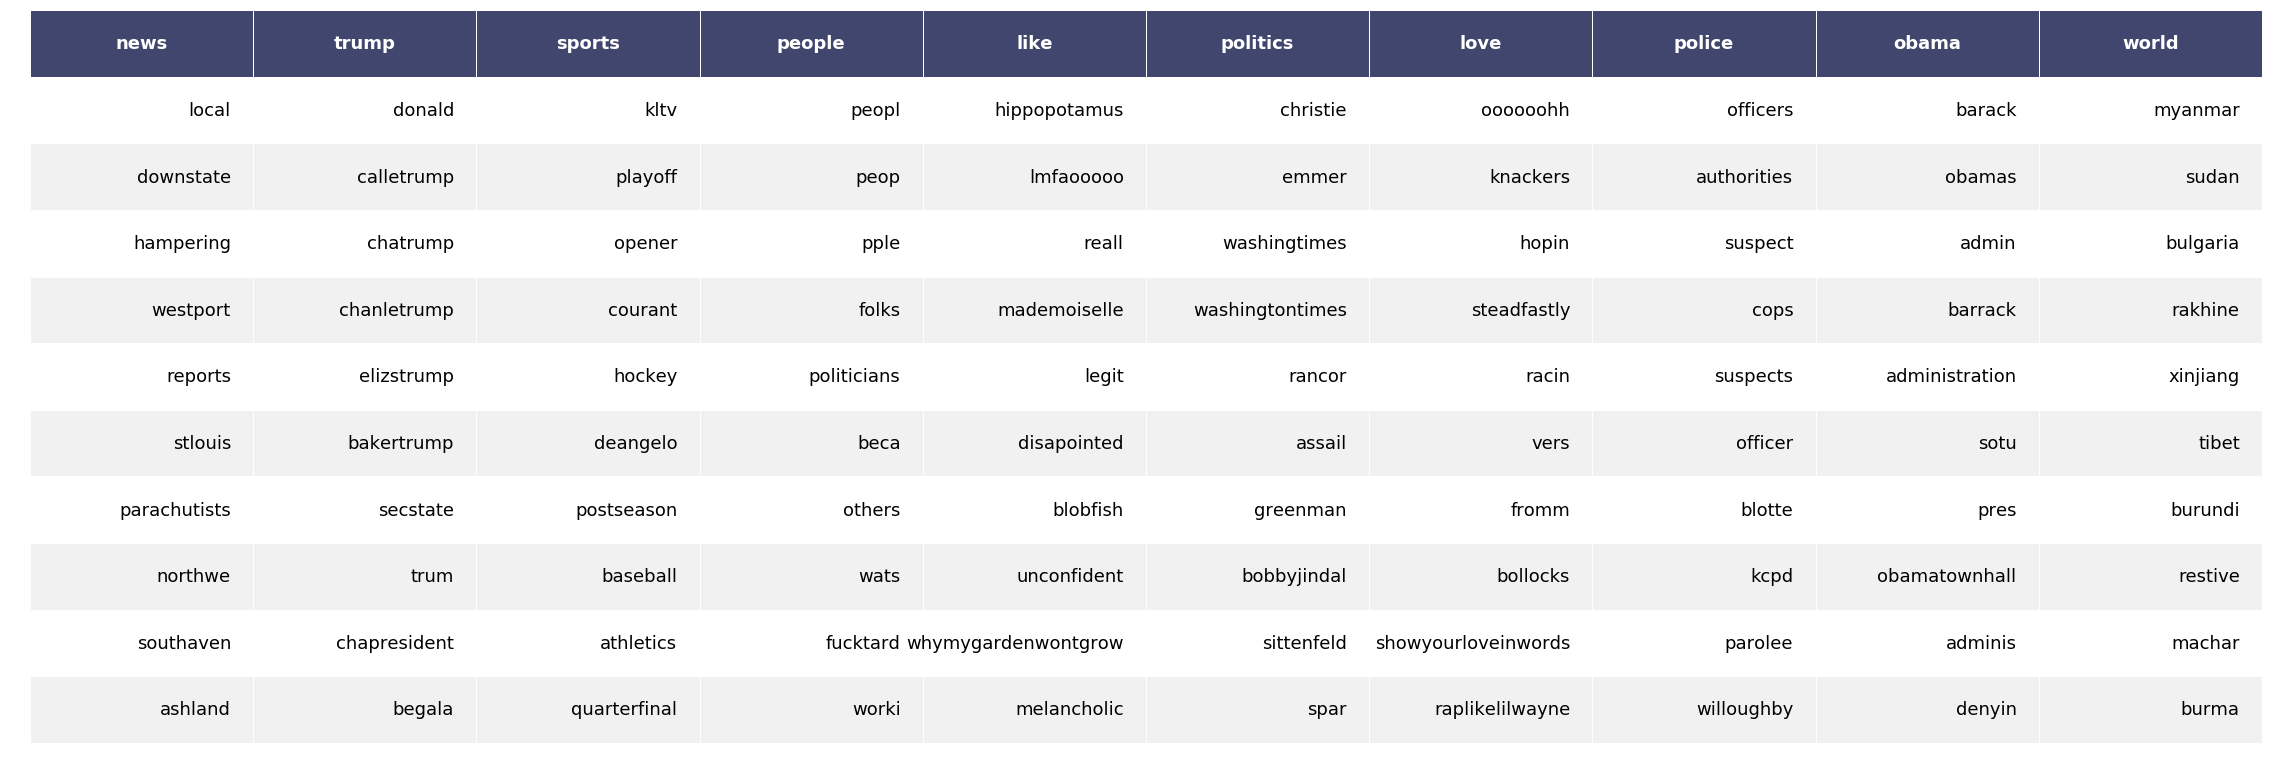

In [18]:
# function for vizualization of dataframe

def render_mpl_table(data, col_width=18.0, row_height=1.225, font_size=18,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

ax = render_mpl_table(sr.iloc[:, 1:], header_columns=0, col_width=4)

In [19]:
fig = ax.get_figure()
fig.savefig('rw.png')

# WORDCLOUD

Visualize the most important words using wordcloud

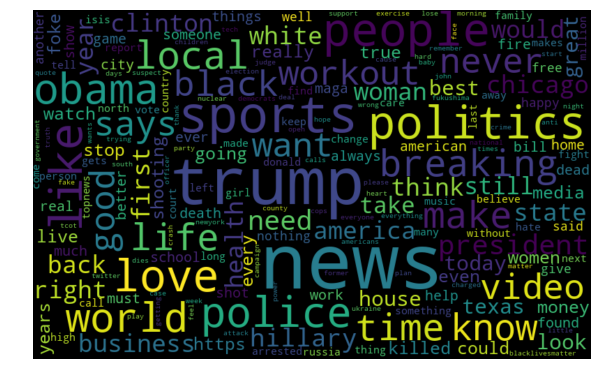

In [190]:
# visualize the most frequent words in tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,stopwords=stopwords).generate_from_frequencies(dict(sorted_x))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file("rus_simple.png")

In [105]:
# clean the tweets by removing urls, whitespaces etc..
df_rus_eng2 = df_rus_eng[df_rus_eng['label']!=3]
df_rus_eng2.tweet_text = df_rus_eng2.tweet_text.apply(preprocess_tweet)
# tokenizing tweets and arranging them into sequences to feed the model
tweets = df_rus_eng2.tweet_text
vocab_size = 4000
tk = Tokenizer(num_words=vocab_size)
#tw = tweets
tk.fit_on_texts(tweets)
t = tk.texts_to_sequences(tweets)

X = np.array(sequence.pad_sequences(t, maxlen=20, padding='post'))
print(X.shape)

(609090, 20)


Use the pretrained model to predict the account category

In [55]:
pd.set_option('display.max_colwidth', -1)

In [70]:
df_rus_eng2[df_rus_eng2['hashtag']=='[maga]'].groupby('prediction').size()

prediction
0    93 
1    62 
2    252
dtype: int64

In [101]:
df_rus_eng2[1:10]

,tweetid,tweet_language,tweet_text,time,hashtag,label
603,844761319035219970,en,breaking president trump fire james comey maga,2017-03-23 04:02,[maga],0
646,919736270623879168,en,touched ourvets militarypatriots best maga,2017-10-16 01:26,[MAGA],0
661,838505711491502080,en,violence hatred that leftists incite conduct against other americans must stop maga,2017-03-05 21:45,[MAGA],0
705,874443375218262017,en,fire mueller maga,2017-06-13 01:48,[MAGA],0
815,898364415900344320,en,when dealing with unconcerned government survival fittest enlist usfa,2017-08-18 02:02,[USFA],0
1007,995453435016335360,en,after golfing tells people their maga,2018-05-12 23:59,[MAGA],0
1535,815019377137303552,en,guardian retracts false claims linking assange russia fakenews,2016-12-31 02:18,[FakeNews],0
2313,798499592182648832,en,defund racist margaret sanger hillarys planned parenthood baby chop shop pjnet,2016-11-15 12:15,[PJNET],0
2328,807669877662093312,en,tillerson state marks battling isis with hashtag campaigns vilifying russia fakenews state dept,2016-12-10 19:34,[fakenews],0


In [106]:
# Predcit the account category
model = load_model('model.h5')
prediction = model.predict(X)
print(prediction.shape)
prediction = np.argmax(prediction,axis=1)
df_rus_eng2['prediction'] = prediction
df_rus_eng2.head()

(609090, 3)


,tweetid,tweet_language,tweet_text,time,hashtag,label,prediction
184,886904062339371008,en,horse pulling carriage cleveland appears collapse during busy saturday night,2017-07-17 11:03,[Cleveland],2,2
189,679432324795203584,en,john carroll university gets million gift news,2015-12-22 22:44,[news],2,0
191,596576312317214721,en,local free spring cook book healthy chocolate bars,2015-05-08 07:24,[local],2,0
192,630746750127489024,en,poll shows trump lead intact after criticism megyn kelly donald trump news online politics,2015-08-10 14:25,[politics],2,2
201,674117251528712192,en,topnews brothers farook decorated veteran other killer,2015-12-08 06:44,[TopNews],2,2


In [104]:
df_rus_eng2.head()

,tweetid,tweet_language,tweet_text,time,hashtag,label,prediction
309,821091474515365890,en,debateable bureaucrats insinuate that trump manditory that accurate anti,2017-01-16 20:27,[Trump],0,2
603,844761319035219970,en,breaking president trump fire james comey maga,2017-03-23 04:02,[maga],0,1
646,919736270623879168,en,touched ourvets militarypatriots best maga,2017-10-16 01:26,[MAGA],0,2
661,838505711491502080,en,violence hatred that leftists incite conduct against other americans must stop maga,2017-03-05 21:45,[MAGA],0,2
705,874443375218262017,en,fire mueller maga,2017-06-13 01:48,[MAGA],0,0


In [107]:
print('Accuracy : ',np.sum(df_rus_eng2['prediction']==df_rus_eng2['label'])/df_rus_eng2.shape[0])

Accuracy :  0.6073026974667126


In [115]:
from sklearn.metrics import classification_report


print(classification_report(df_rus_eng2['label'],df_rus_eng2['prediction']))
from sklearn.metrics import accuracy_score
print(accuracy_score(df_rus_eng2['label'], df_rus_eng2['prediction']))

             precision    recall  f1-score   support

          0       0.05      0.28      0.09     31193
          1       0.05      0.10      0.06     22357
          2       0.91      0.65      0.76    555540

avg / total       0.84      0.61      0.70    609090

0.6073026974667126


In [159]:
list_hashtags = []
df.hashtags.apply(lambda l: list_hashtags.extend(l))
pd.Series(list_hashtags).value_counts().head(15)

news                131268
sports               48950
politics             39920
world                27642
local                26111
maga                 16110
tcot                 15626
topnews              15162
blacklivesmatter     14351
pjnet                13251
health               11595
business             10943
новости              10546
tech                  8270
breaking              7817
dtype: int64

In [20]:
list_hashtags = []
df_rus_eng.hashtag.apply(lambda l: list_hashtags.append(l[1:-1].lower()))
list_hashtags = list(filter(None, list_hashtags))
pd.Series(list_hashtags).value_counts().head(15)

news             149582
sports            97387
politics          72744
local             30877
world, news       27485
health            21411
business          18905
local, news       16644
topnews           16245
breaking          15980
news, chicago     15168
newyork           13185
foke              11084
showbiz           10854
tech              10498
dtype: int64

We can see that both datasets share the most recurrent hashtags like news, sports, politics etc.. Which means using one to infer insights about the other is valid. In the same time, we see that some political hashtags like maga (Make America Great Again) doesn't appear in the new troll dataset.

In [21]:
temp = df_rus_eng[df_rus_eng['time']>'2016-06-16 16:19']

In [22]:
len(temp)
# Almost half of the English tweets in this dataset is after the start of Trump's presidential compaign

1488231

In [23]:
list_hashtags = []
temp.hashtag.apply(lambda l: list_hashtags.append(l[1:-1].lower()))
list_hashtags = list(filter(None, list_hashtags))
pd.Series(list_hashtags).value_counts().head(15)

world, news                    7700
news                           5422
maga                           4881
sports                         4840
top                            4587
politics                       4250
todolistbeforechristmas        3594
topnews                        3253
survivalguidetothanksgiving    3200
thingsyoucantignore            3164
mustbebanned                   3039
2016in4words                   2995
igetdepressedwhen              2867
ihatepokemongobecause          2627
nowplaying                     2568
dtype: int64

We can see that we take into account Only the period starting with the compaign, we retrieve some political hashtags.

In [29]:
# Here we clean the tweets by removing urls, whitespaces etc..
pd.set_option('display.max_colwidth', -1)
df_rus_eng.tweet_text = df_rus_eng.tweet_text.apply(preprocess_tweet)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [27]:
df_rus_eng.head()

,tweetid,tweet_language,tweet_text,time,hashtag
8,567357519547207680,en,cloud give moon shadow rhythm world makes itself apparent saying have faith yourself this,2015-02-16 16:19,
10,493894187079974912,en,down comfort strangers,2014-07-28 23:02,
11,493688319902220288,en,laughing more than should,2014-07-28 09:24,[USA]
12,497543470211678209,en,saying sorry,2014-08-08 00:43,
33,500956712657223680,en,laugh your face,2014-08-17 10:46,


In [28]:
df.groupby('account_category').size()

account_category
Commercial      113256
Fearmonger      10855 
HashtagGamer    216048
LeftTroll       413711
NewsFeed        597656
NonEnglish      27632 
RightTroll      706120
Unknown         7261  
dtype: int64

In [30]:
df_arranged = df[['content','account_category']]
df_arranged.content = df_arranged.content.apply(preprocess_tweet)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [31]:
df_arranged['label'] = df_arranged.account_category.map({'RightTroll': 0, 'LeftTroll': 1})

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_arranged.label.fillna(2,inplace=True)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [19]:
df_arranged.head()

,content,account_category,label
0,have sitting democrat senator trial corruptio...,RightTroll,0.0
1,marshawn lynch arrives game anti trump shirt ...,RightTroll,0.0
2,daughter fallen navy sailor delivers powerful ...,RightTroll,0.0
3,just president trump dedicates presidents gol...,RightTroll,0.0
4,respecting national anthem standforouranthe...,RightTroll,0.0


In [20]:
df_arranged.groupby('label').size()

label
0.0    706120
1.0    413711
2.0    972708
dtype: int64

#  USING LSTM MODEL

In [41]:
# tokenizing tweets and arranging them into sequences to feed the model
tweets = df_arranged.content
vocab_size = 8000
tk = Tokenizer(num_words=vocab_size)
#tw = tweets
tk.fit_on_texts(tweets)
t = tk.texts_to_sequences(tweets)

X = np.array(sequence.pad_sequences(t, maxlen=20, padding='post'))
y = df_arranged.label

print(X.shape, y.shape)

(2973371, 20) (2973371,)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

In [44]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(vocab_size, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 128)           1024000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 20, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 591       
Total params: 1,279,391
Trainable params: 1,279,391
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train, batch_size=64, verbose=1, validation_data = (x_test,y_test), epochs=5)

Train on 2378696 samples, validate on 594675 samples
Epoch 1/5
2378696/2378696 [==============================] - 2131s 896us/step - loss: 0.4267 - acc: 0.8246 - val_loss: 0.4024 - val_acc: 0.8347
Epoch 2/5
2378696/2378696 [==============================] - 3111s 1ms/step - loss: 0.4034 - acc: 0.8343 - val_loss: 0.3944 - val_acc: 0.8388
Epoch 3/5
2378696/2378696 [==============================] - 2312s 972us/step - loss: 0.3963 - acc: 0.8378 - val_loss: 0.3916 - val_acc: 0.8402
Epoch 4/5
 232640/2378696 [=>............................] - ETA: 33:23 - loss: 0.3905 - acc: 0.8409

# CONVOLUTION NEURAL NET MODEL

In [33]:
# tokenizing tweets and arranging them into sequences to feed the model
tweets = df_arranged.content
vocab_size = 4000
tk = Tokenizer(num_words=vocab_size)
#tw = tweets
tk.fit_on_texts(tweets)
t = tk.texts_to_sequences(tweets)

X = np.array(sequence.pad_sequences(t, maxlen=20, padding='post'))
y = df_arranged.label

print(X.shape, y.shape)

(2973371, 20) (2973371,)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)

In [35]:
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dropout
from keras.models import load_model

# building a model

model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=20))
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(filters=128, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            128000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 64)            10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           49280     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 128)            0         
__________

Train on 1992158 samples, validate on 981213 samples
Epoch 1/15
1992158/1992158 [==============================] - 380s 191us/step - loss: 0.4368 - acc: 0.8040 - val_loss: 0.3540 - val_acc: 0.8444
Epoch 2/15
1992158/1992158 [==============================] - 459s 231us/step - loss: 0.3284 - acc: 0.8536 - val_loss: 0.3127 - val_acc: 0.8605
Epoch 3/15
1992158/1992158 [==============================] - 384s 193us/step - loss: 0.3098 - acc: 0.8615 - val_loss: 0.2990 - val_acc: 0.8678
Epoch 4/15
1992158/1992158 [==============================] - 216s 108us/step - loss: 0.2961 - acc: 0.8706 - val_loss: 0.2886 - val_acc: 0.8743
Epoch 5/15
1992158/1992158 [==============================] - 220s 110us/step - loss: 0.2874 - acc: 0.8754 - val_loss: 0.2831 - val_acc: 0.8771
Epoch 6/15
1992158/1992158 [==============================] - 217s 109us/step - loss: 0.2835 - acc: 0.8771 - val_loss: 0.2797 - val_acc: 0.8784
Epoch 7/15
1992158/1992158 [==============================] - 215s 108us/step - los

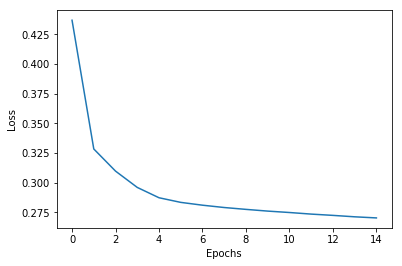

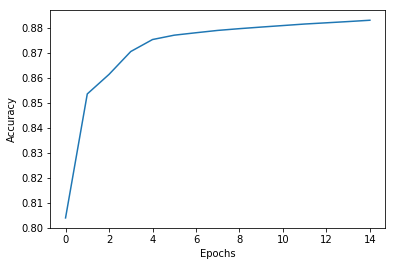

In [36]:
history = model.fit(x_train, y_train, batch_size=64, verbose=1, validation_data = (x_test,y_test), epochs=15)
model.save('model_new.h5')
model = load_model('model_new.h5')
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.savefig('Figure 1')

plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Figure 1')

In [29]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76    233025
           1       0.68      0.54      0.60    136518
           2       0.81      0.88      0.84    320995

   micro avg       0.77      0.77      0.77    690538
   macro avg       0.75      0.72      0.73    690538
weighted avg       0.77      0.77      0.77    690538

0.770884440827297


The idea is now to test the category classifier on the unlabeled Russian tweet. We are going to use the tweets with hashtags to label them first and evaluate the performance of the classifier based on this noisy labeling.

In [44]:
df_rus_eng.head()

,tweetid,tweet_language,tweet_text,time,hashtag
8,567357519547207680,en,cloud give moon shadow rhythm world makes itself apparent saying have faith yourself this,2015-02-16 16:19,NaN
10,493894187079974912,en,down comfort strangers,2014-07-28 23:02,NaN
11,493688319902220288,en,laughing more than should,2014-07-28 09:24,[USA]
12,497543470211678209,en,saying sorry,2014-08-08 00:43,NaN
33,500956712657223680,en,laugh your face,2014-08-17 10:46,NaN


In [45]:
# tokenizing tweets and arranging them into sequences to feed the model
tweets = df_rus_eng.tweet_text
vocab_size = 4000
tk = Tokenizer(num_words=vocab_size)
#tw = tweets
tk.fit_on_texts(tweets)
t = tk.texts_to_sequences(tweets)

X = np.array(sequence.pad_sequences(t, maxlen=20, padding='post'))
#y = df_arranged.label

#print(X.shape, y.shape)

In [48]:
prediction = model.predict(X)

In [51]:
prediction = np.argmax(prediction,axis=1)

In [52]:
prediction

array([0, 2, 2, ..., 1, 2, 2], dtype=int64)

In [53]:
df_rus_eng['prediction'] = prediction

C:\Users\Ahmed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_rus_eng.head(20)

,tweetid,tweet_language,tweet_text,time,hashtag,prediction
8,567357519547207680,en,cloud give moon shadow rhythm world makes itself apparent saying have faith yourself this,2015-02-16 16:19,NaN,0
10,493894187079974912,en,down comfort strangers,2014-07-28 23:02,NaN,2
11,493688319902220288,en,laughing more than should,2014-07-28 09:24,[USA],2
12,497543470211678209,en,saying sorry,2014-08-08 00:43,NaN,0
33,500956712657223680,en,laugh your face,2014-08-17 10:46,NaN,2
34,548763776267218944,en,takes courage make fool yourself charlie chaplin,2014-12-27 08:54,NaN,2
35,577477794218668032,en,want normal live with boyfriend,2015-03-16 14:33,[],1
42,553095178118893568,en,reverie when ideas float mind without reflection regard understanding john locke,2015-01-08 07:45,NaN,0
43,873202881222111233,en,meet democrat next obama,2017-06-09 15:39,[],1
44,874244693307031552,en,kellyanne conway denies reports leaking confidential information party,2017-06-12 12:39,[],1


In [56]:
# extract hashtags, check for every hachtag in which category it occurs the most, label every tweet with the hashtag.
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,hashtags
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on trial for corruption and you've barely heard a peep from the mainstream media."" ~ @nedryun https://t.co/gh6g0D1oiC",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll,[]
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll,[]
2,9.060000e+17,10_GOP,"Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear. #BoycottNFL https://t.co/qDlFBGMeag",Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll,[boycottnfl]
3,9.060000e+17,10_GOP,"JUST IN: President Trump dedicates Presidents Cup golf tournament trophy to the people of Florida, Texas and Puerto Rico. https://t.co/z9wVa4djAE",Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll,[]
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandForOurAnthemðŸ‡ºðŸ‡¸ https://t.co/czutyGaMQV",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll,[standforouranthemðÿ‡ºðÿ]


# IRAN DATA

In [4]:
iran_troll_stats = pd.read_csv('iran_troll_tweet_stats.csv')
iran_troll_text = pd.read_csv('iran_troll_tweet_text.csv')

In [5]:
iran_troll_text.head()

,tweetid,tweet_language,tweet_text
0,533622371429543936,fr,@bellisarobz Ces photos illustrent parfaitemen...
1,527205814906654721,en,@ParkerLampe An inquiry by congress confirms t...
2,545166827350134784,en,@hadeelhmaidi @wordpressdotcom CIA predict thi...
3,538045437316321280,fr,@MartinYannis l'avis bizarre de marcel tonton ...
4,530053681668841472,fr,@courrierinter Les laboratoires US de guerre b...


In [6]:
iran_troll_text['time'] = iran_troll_stats.tweet_time
iran_troll_text['hashtag'] = iran_troll_stats.hashtags

In [7]:
assert(all(iran_troll_text.tweetid == iran_troll_stats.tweetid))

In [8]:
df_iran_eng = iran_troll_text[iran_troll_text.tweet_language=='en']

In [9]:
# Replace nan with empty string for tweets that not contain hashtags
df_iran_eng.hashtag.fillna('',inplace=True)

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
# prprocess the tweets
iran_most_pop = pd.DataFrame()
iran_most_pop['tweets'] = df_iran_eng.tweet_text.apply(preprocess_tweet)
iran_most_pop['tweets'] = iran_most_pop['tweets'].apply(remove_stopwords)

In [21]:
# initialize the tokenizer 
tokenizer = Tokenizer(num_words=None,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

# tokenize the words
tokenizer.fit_on_texts(iran_most_pop['tweets'])

In [22]:
# sort the words by frequency, print the most popular words
sorted_x = sorted(tokenizer.word_counts.items(), key=operator.itemgetter(1))
i = 0
most_popular_words_iran = []
for item in reversed(sorted_x):
    most_popular_words_iran.append(item[0])
    i += 1
    if i < 9:
        print(item[0])

isis
trump
saudi
iran
israel
syria
israeli
arabia


In [25]:
#create list of senstences to pass into the word2vec
sentences = pd.DataFrame()
sentences['sen'] = iran_most_pop['tweets'].apply(tokenize)
list_senten = sentences['sen'].tolist()
model = Word2Vec(list_senten, size=80, min_count=4, window=5, sg=1)
# Saving the model
model.save("iran.bin")
# Loading the saved model
model = Word2Vec.load("iran.bin")

In [38]:
# get the most similar words using word2vec
sr = pd.Series()
for i,word in enumerate(most_popular_words_iran):
    if i > 9:
        break
    s = pd.Series([x[0] for x in model.wv.most_similar(word)], name=word)
    sr = pd.concat([sr, s], axis=1)
sr.iloc[:, 1:]

/home/neeraj/anaconda3/envs/tensor/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,isis,trump,saudi,iran,israel,syria,israeli,arabia,president,yemen
0,eill,donald,arabia,iranian,israeli,syrianarmy,zionist,saudi,faded,yemengenocide
1,jihadi,presidenttrump,saudiarabian,tehran,israelcrimes,aleppo,settler,yemenpress,presidents,hodeidah
2,qaida,lynch,stirred,realiran,zionist,eastghouta,snipers,saudiarabia,pres,thestoryofyemen
3,islamicstate,battlegrounds,yemengenocide,rouhani,zionismagainsthumanity,syriawar,alon,ruler,vetoed,yemenwarcup
4,alnusra,deforming,yemenchildren,irandeal,aviv,tanf,israelioccupation,deposed,curiously,yemencantwait
5,plundering,donaldtrump,refueling,baku,israelis,alepporetaken,accomplice,bahrein,controversies,coalition
6,izadi,impeachtrump,stoparmingsaudi,azerbaijan,israeliregime,deirezzor,pales,shittes,handshake,yemenfamine
7,trainer,notmypresident,alwaleed,afkham,thorn,gouta,azaria,succession,recep,famine
8,iraqiforces,trashing,prince,irantoday,universally,syrian,khanalahmar,emirati,nieto,yemeni
9,jihadis,anticipation,deposed,lifting,mondoweiss,idlib,bulldozers,dearly,zimbabwean,yemenwar


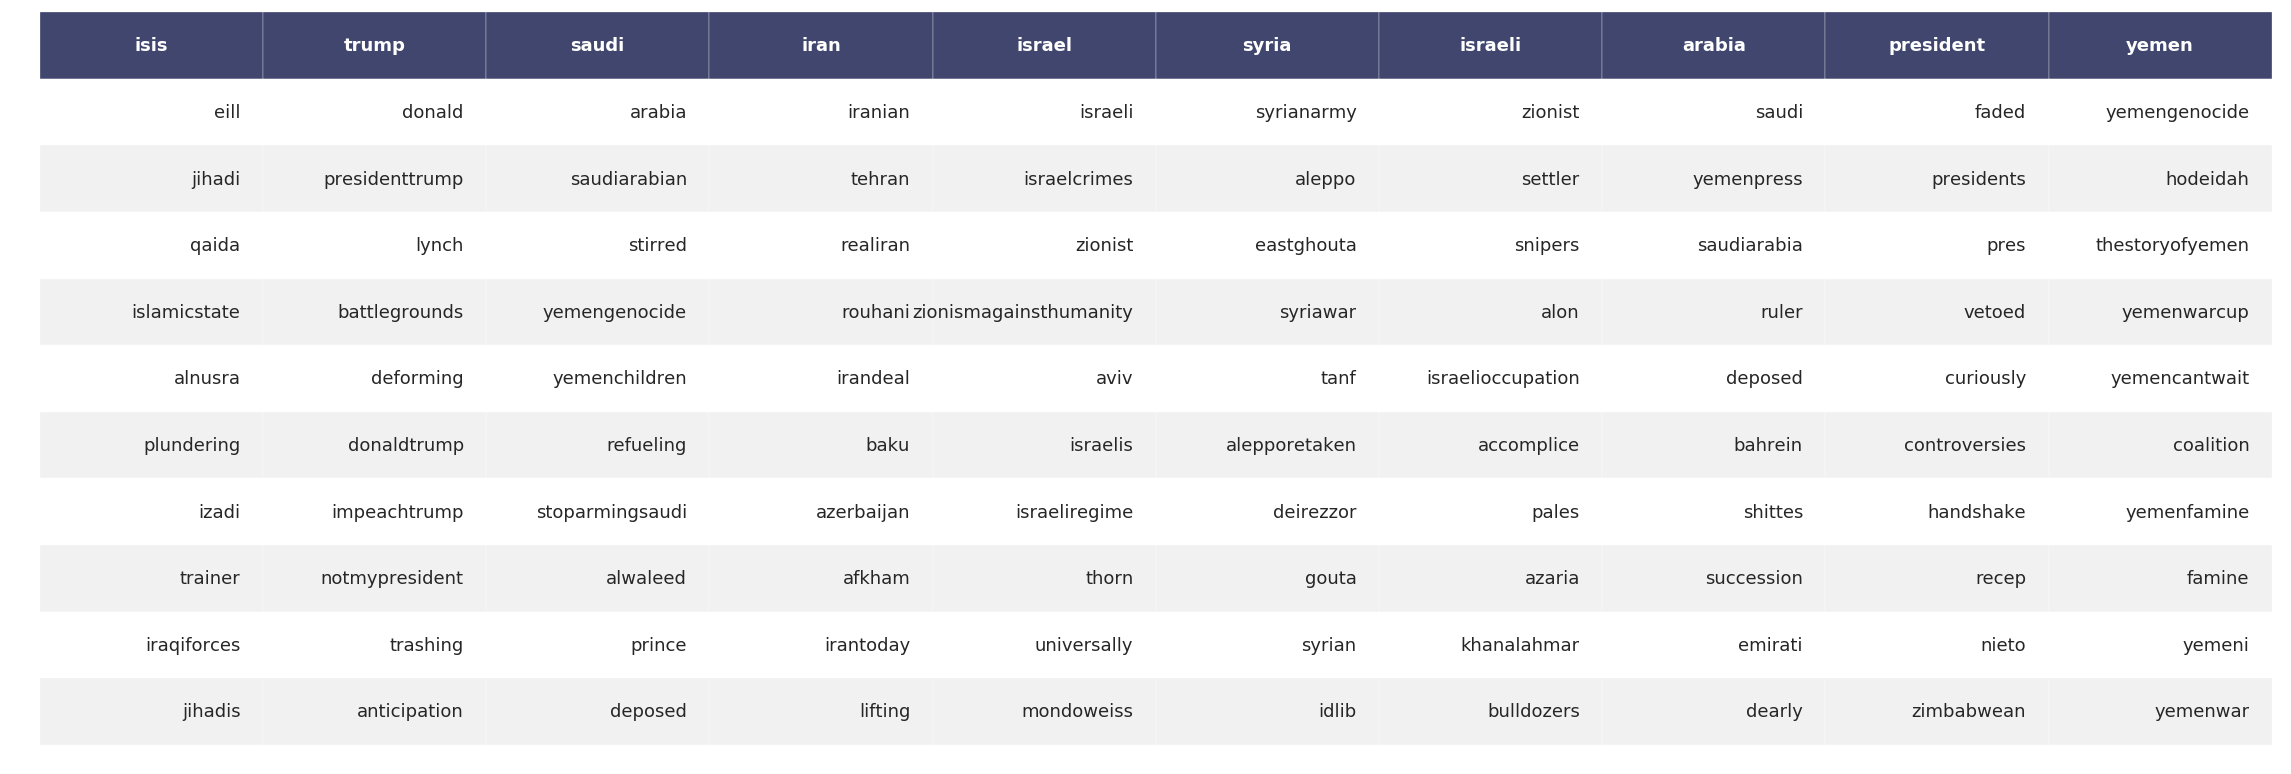

In [41]:
ax = render_mpl_table(sr.iloc[:, 1:], header_columns=0, col_width=4)

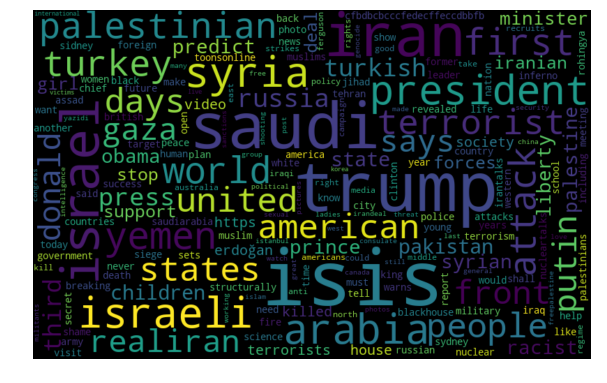

In [27]:
# visualize the most frequent words in tweets
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,stopwords=stopwords).generate_from_frequencies(dict(sorted_x))

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file("iran_simple.png")

In [28]:
# Extract all the hashtags from Iran data into a list, count frequency and convert into datframe
list_hashtags = []
df_iran_eng.hashtag.apply(lambda l: list_hashtags.append(l[1:-1].lower()))
list_hashtags = list(filter(None, list_hashtags))
iran_hastags = [x.split(',') for x in list_hashtags]
flat_iran_hashtags = [item for sublist in iran_hastags for item in sublist]
flat_iran_hashtags = [x.strip(' ') for x in flat_iran_hashtags]
iran_hashtag_df = pd.DataFrame(pd.Series(flat_iran_hashtags).value_counts()).reset_index().rename(columns={'index':'hashtag', 0:'count'})
iran_hashtag_df['label'] = 'Iran'
iran_hashtag_df.head()

,hashtag,count,label
0,iran,9450,Iran
1,trump,6163,Iran
2,realiran,5557,Iran
3,us,4322,Iran
4,yemen,3914,Iran


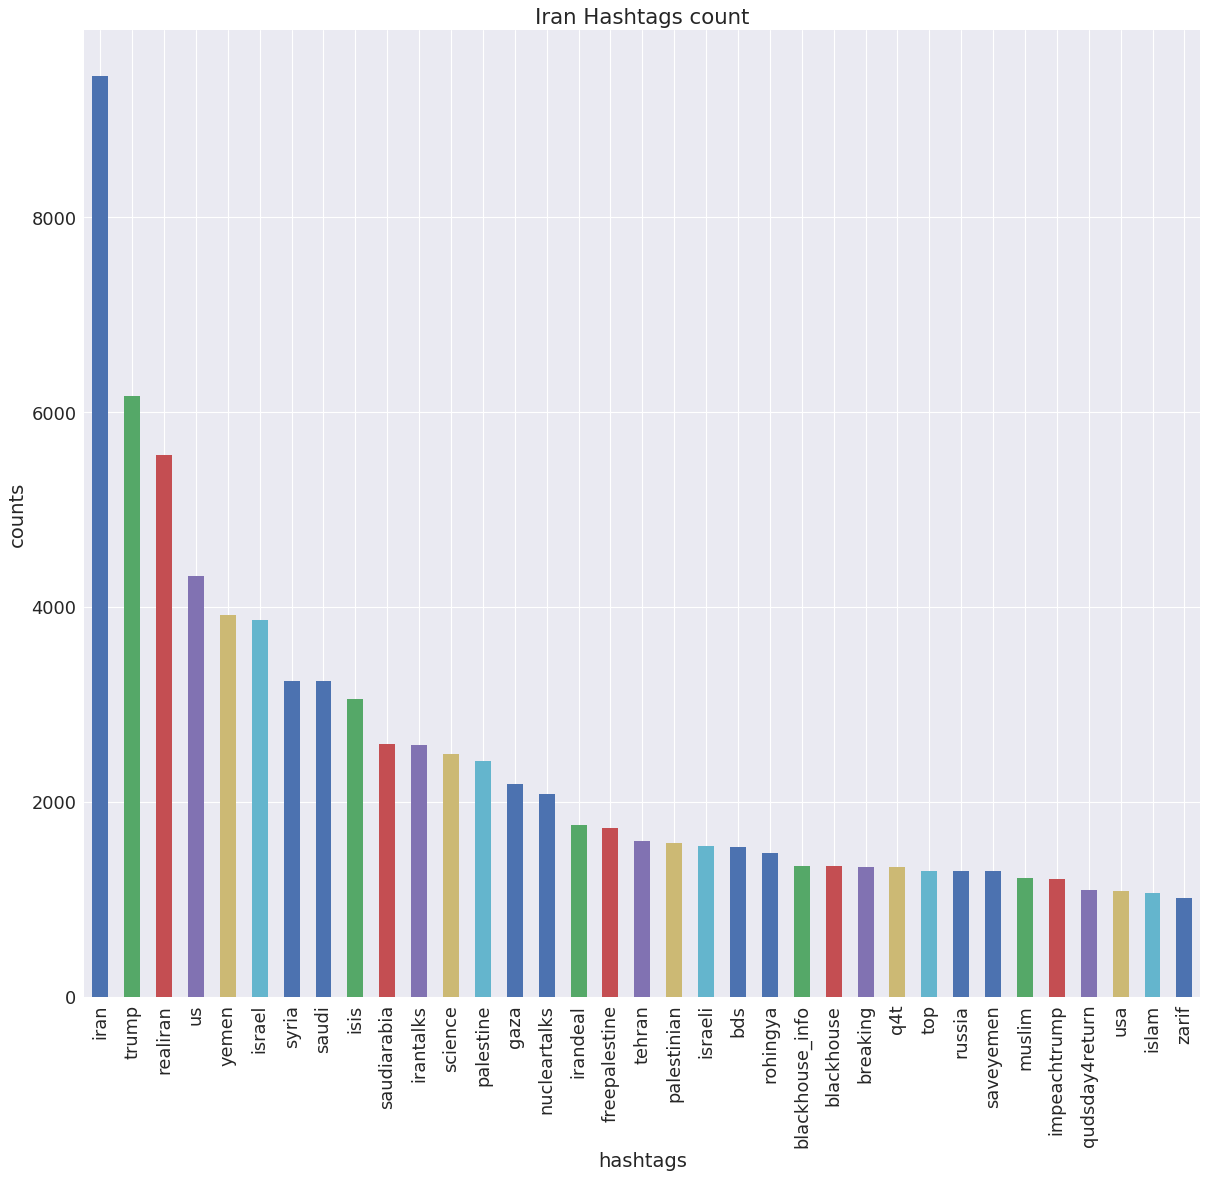

In [29]:
# plot the most frequent hashtags in Iran tweets
sns.set(font_scale=1.6)
df = pd.DataFrame((flat_iran_hashtags)).groupby(0).size().sort_values(ascending = False)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df[:35].plot.bar()
plt.ylabel('counts')
plt.xlabel('hashtags')
plt.title('Iran Hashtags count')
fig.savefig('ihas.png')

In [32]:
# Extract all the hashtags from Russian data into a list, count frequency and convert into datframe
list_hashtags = []
df_rus_eng.hashtag.apply(lambda l: list_hashtags.append(l[1:-1].lower()))
list_hashtags = list(filter(None, list_hashtags))
rus_hastags = [x.split(',') for x in list_hashtags]
flat_rus_hashtags = [item for sublist in rus_hastags for item in sublist]
flat_rus_hashtags = [x.strip(' ') for x in flat_rus_hashtags]
rus_hashtag_df = pd.DataFrame(pd.Series(flat_rus_hashtags).value_counts()).reset_index().rename(columns={'index':'hashtag', 0:'count'})
rus_hashtag_df['label'] = 'Russia'
rus_hashtag_df.head()

,hashtag,count,label
0,news,244552,Russia
1,sports,99044,Russia
2,politics,76583,Russia
3,local,55256,Russia
4,world,29568,Russia


Text(0.5,1,'Russian Hashtags count')

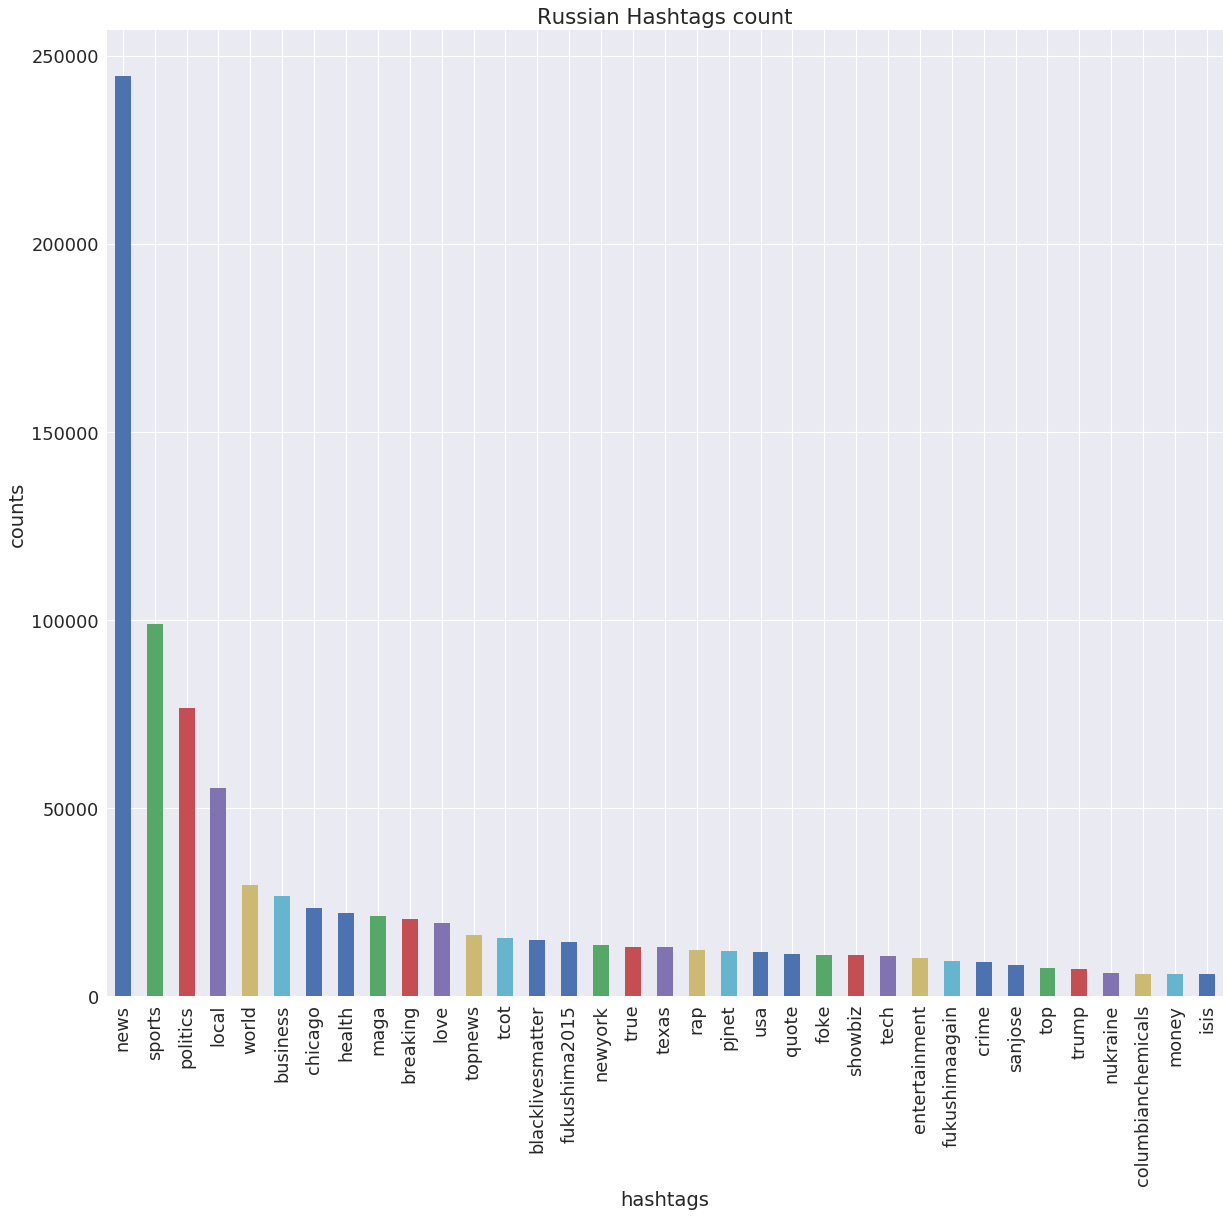

In [33]:
# plot the most frequent hashtags in Russian tweets
df = pd.DataFrame((flat_rus_hashtags)).groupby(0).size().sort_values(ascending = False)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df[:35].plot.bar()
plt.ylabel('counts')
plt.xlabel('hashtags')
plt.title('Russian Hashtags count')

In [34]:
# compute common hashtags
common_hashtags = list(set(flat_rus_hashtags).intersection(flat_iran_hashtags))
print('common hashtags',len(common_hashtags))
print('Total hashtags',len(set(flat_rus_hashtags))+ len(set(flat_iran_hashtags)) - len(common_hashtags))

common hashtags 10890
Total hashtags 103270


Text(0.5,1,'Languages count')

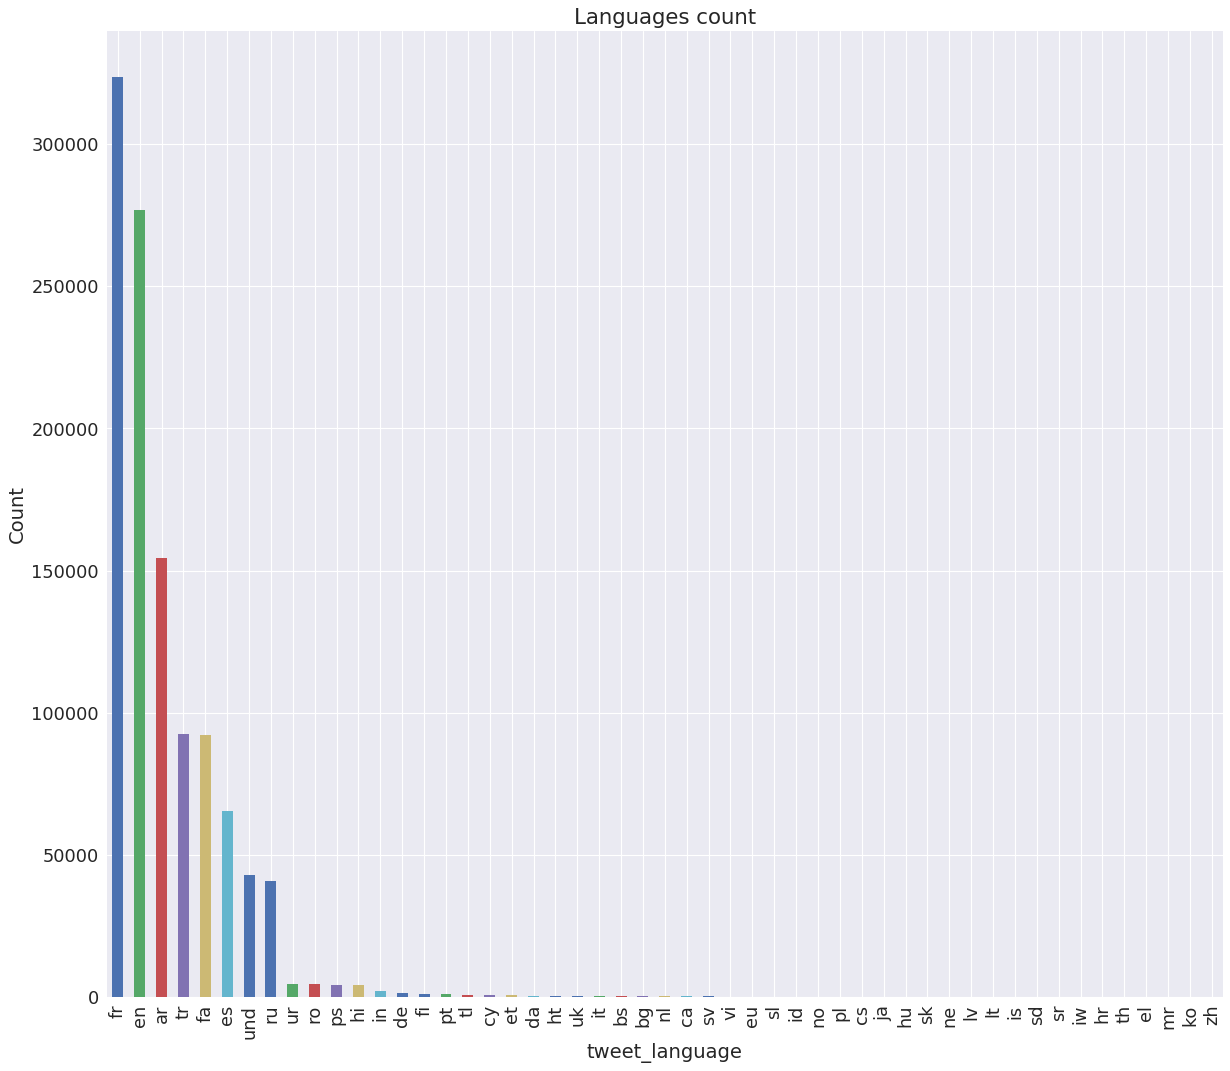

In [35]:
# Plot the frequnecy of languages in Iran tweets
lang_df = iran_troll_text.groupby(['tweet_language']).size().sort_values(ascending = False)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
lang_df.plot.bar()
plt.ylabel('Count')
plt.title('Languages count')

In [36]:
def get_tweet_count(df):
    date_idx = pd.DatetimeIndex(df.time)
    times = pd.Series([1]*len(date_idx), index=date_idx)
    tweet_times = pd.DataFrame({'tweet_count':times})
    return tweet_times

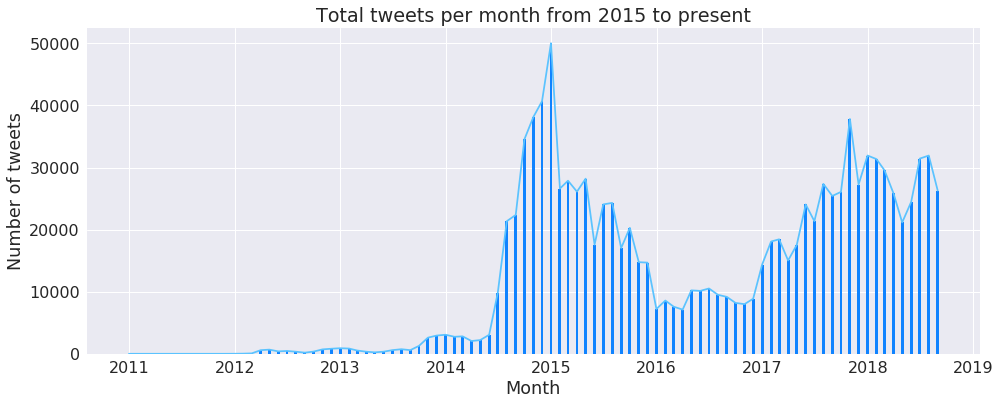

In [37]:
tweet_times = get_tweet_count(iran_troll_text)
monthly = tweet_times.resample('M').sum()
fig2, ax2 = plt.subplots(1,1, figsize=(16,6))
ax2.bar(monthly.index.values, monthly["tweet_count"].values, width=10, color="#0f83ff")
ax2.plot(monthly["tweet_count"], color="#5bc3ff")
ax2.set_title("Total tweets per month from 2015 to present")
ax2.set_xlabel("Month")
ax2.set_ylabel("Number of tweets")
plt.show()